# Derivatives Analytics - Objects Composition

**Author**: [Gabriele Pompa](https://www.linkedin.com/in/gabrielepompa/): gabriele.pompa@unisi.com

# Table of contents

[Executive Summary](#executive-summary)

**TODO**

### **Resources**: 

- [_Python for Finance (2nd ed.)_](http://shop.oreilly.com/product/0636920117728.do): Chapter 6 Object-Oriented Programming.


- [Object-Oriented Programming in Python](https://python-textbok.readthedocs.io/en/1.0/index.html): Section [Object-oriented programming](https://python-textbok.readthedocs.io/en/1.0/Object_Oriented_Programming.html)



# Executive Summary <a name="executive-summary"></a>

**Make intro**

The following sections are organized as follows:

- **TODO**

These are the basic imports

In [1]:
# for NumPy arrays
import numpy as np

# for Pandas Series and DataFrame
import pandas as pd

# for statistical functions
from scipy import stats

# for Matplotlib plotting
import matplotlib.pyplot as plt

# to do inline plots in the Notebook
%matplotlib inline

# for Operating System operations
import os

# for some mathematical functions
import math

# for date management
import datetime as dt

## `*args` and `**kwargs`

In [2]:
def print_args(*args):
    for arg in args:
        print(arg)

In [3]:
print_args("one", "two", "three")

one
two
three


In [4]:
print_args("one", "two", "three", "four")

one
two
three
four


If a function takes `*args` positional parameters, it also means that we can call it unpacking (through the `*` operator) a standard Tuple, like `tup` here

In [5]:
tup = ("a", 1, "c")

print_args(*tup)

a
1
c


This make it easier to make variable-length positional parameters flow through nested functions, like here:

In [6]:
def print_args_wrapper(*args):
    print("I am in print_args_wrapper function")
    # here args is a Tuple, that is un-packed by the * operator and passed to print_args function
    print_args(*args)

In [7]:
print_args_wrapper(tup)

I am in print_args_wrapper function
('a', 1, 'c')


In [8]:
def print_kwargs(**kwargs):
    for k, v in kwargs.items():
        print("{}: {}".format(k, v))

In [9]:
print_kwargs(name="Jane", surname="Doe")

name: Jane
surname: Doe


In [10]:
print_kwargs(age=10)

age: 10


If a function takes `**args` keyword parameters, it also means that we can call it unpacking (through the `**` operator) a standard Dict, like `d` here

In [11]:
d = {"k1": "a", "k2": 1, "k3": "c"}

print_kwargs(**d)

k1: a
k2: 1
k3: c


This make it easier to make keyword parameters flow through nested functions, like here:

In [12]:
def print_kwargs_wrapper(**kwargs):
    print("I am in print_kwargs_wrapper function")
    # here kwargs is a Dict, that is un-packed in key-value pairs by the ** operator and passed to print_kwargs function
    print_kwargs(**kwargs)

In [13]:
print_kwargs_wrapper(**d)

I am in print_kwargs_wrapper function
k1: a
k2: 1
k3: c


If a function takes only `*args` and `**kwargs` as its parameters, it can be called with any set of parameters

In [14]:
def print_everything(*args, **kwargs):
    for arg in args:
        print(arg)

    for k, v in kwargs.items():
        print("{}: {}".format(k, v))

In [15]:
print_everything("one", "two", "three")

one
two
three


In [16]:
print_everything(name="Jane", surname="Doe")

name: Jane
surname: Doe


In [17]:
print_everything("one", "two", "three", name="Jane", surname="Doe")

one
two
three
name: Jane
surname: Doe


This means also no parameters

In [18]:
print_everything()

As previously seen for `*args` and `**kwargs` separately, the use of `*args` and `**kwargs` make it easy to flow parameters through nested functions, like here:

In [19]:
def print_everything_wrapper(*args, **kwargs):
    print("I am in print_everything_wrapper function")
    # here args is a Tuple, that is un-packed by the * operator and passed to print_everything function
    # here kwargs is a Dict, that is un-packed in key-value pairs by the ** operator and passed to print_everything function
    print_everything(*args, **kwargs)

In [20]:
print_everything_wrapper(*tup, **d)

I am in print_everything_wrapper function
a
1
c
k1: a
k2: 1
k3: c


DA RISPIEGARE 

This makes it allows the nesting function `print_everything_wrapper` to ignore the details of the parameters of the nested function `print_everything`. This is particularly useful when the nesting function is the constructor (the `__init__()`) of a derived class and the nested function is the constructor of the base class (the `super().__init__()`).

`*args` and `**kwargs` can be mixed with ordinary parameters, which must come first in function's definition

In [21]:
def print_everything_combined(city, title="default_title", *args, **kwargs):
    
    print("city is {}".format(city))
    
    print("title is {}".format(title))
    
    for arg in args:
        print(arg)

    for k, v in kwargs.items():
        print("{}: {}".format(k, v))

In [22]:
print_everything_combined("Rome", "one", "two", "three", name="Jane", surname="Doe")

city is Rome
title is one
two
three
name: Jane
surname: Doe


In [23]:
print_everything_combined("Rome", "different title", "one", "two", "three", name="Jane", surname="Doe")

city is Rome
title is different title
one
two
three
name: Jane
surname: Doe


In [24]:
# raises: SyntaxError: positional argument follows keyword argument
#
# print_everything_combined(city="Rome", "one", "two", "three", name="Jane", surname="Doe")

# Polymorphism application: a `Plotter()` class

First let's define a common MarketEnvironment class which shall contain the information on market environment and underlying level. This class will be used to instantiate the EuropeanOption class

In [25]:
def parse_date(date):
    return dt.datetime.strptime(date, "%d-%m-%Y") if isinstance(date, str) else date

In [26]:
class MarketEnvironment:
    """
    MarketEnvironment class: setting the market environment: date, underlying level, volatility level and short-rate.
    
    Attributes:
    -----------
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        r (float):                continuously compounded short-rate;
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        sigma (float):            volatility of underlying asset;
    
    Public Methods:
    --------   
    
        getters and setters for all attributes
        
    Usage: 
    --------   
        - default: MarketEnvironment() is equivalent to 
                   MarketEnvironment(t="19-04-2020", r=0.05, S_t=90.0, sigma=0.2)

        - general: MarketEnvironment(t="DD-MM-YYYY" String, r=Float, S_t=Float, sigma=Float)
    """
    
    def __init__(self, t="19-04-2020", r=0.05, S_t=90.0, sigma=0.2):
        
        print("Initializing the MarketEnvironment!")
        
        self.__t     = parse_date(t)
        self.__r     = r
        self.__S     = S_t
        self.__sigma = sigma
        
    def __repr__(self):
        return r"MarketEnvironment(t={}, r={:.1f}%, S_t={:.1f}, sigma={:.1f}%)".\
               format(self.get_t().strftime("%d-%m-%Y"), self.get_r()*100, self.get_S(), self.get_sigma()*100)

    # getters
    def get_t(self):
        return self.__t

    def get_r(self):
        return self.__r

    def get_S(self):
        return self.__S
    
    def get_sigma(self):
        return self.__sigma
    
    # setters 
    def set_t(self, t):
        self.__t = parse_date(t)

    def set_r(self, r):
        self.__r = r

    def set_S(self, S):
        self.__S = S
        
    def set_sigma(self, sigma):
        self.__sigma = sigma

In [27]:
market_env = MarketEnvironment(t="01-06-2020", r=-0.002, S_t=10.0, sigma=0.4)
market_env

Initializing the MarketEnvironment!


MarketEnvironment(t=01-06-2020, r=-0.2%, S_t=10.0, sigma=40.0%)

In [28]:
market_env = MarketEnvironment()
market_env

Initializing the MarketEnvironment!


MarketEnvironment(t=19-04-2020, r=5.0%, S_t=90.0, sigma=20.0%)

In [29]:
class EuropeanOption:
    """
    EuropeanOption abstract class: an interface setting the template for any option with european-style exercise.
    This class is not meant to be instantiated.
    
    Attributes:
    -----------
        type (str):               type of the option. Can be either 'call' or 'put';
        S_t (float):              'S' attribute of mkt_env.
        K (float):                strike price;
        t (str; dt.datetime):     't' attribute of mkt_env.
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                'r' attribute of mkt_env.
        sigma (float):            'sigma' attribute of mkt_env.
    
    Template Methods:
    --------   
    
        getters for all common attributes
        
        setters for common attributes, not belonging to mkt_env
        
        payoff: float
            Template method for payoff. Raises NotImplementedError if called.

        price_upper_limit: float 
            Template method for upper limit. Raises NotImplementedError if called.

        price_lower_limit: float 
            Template method for lower limit. Raises NotImplementedError if called.
            
        price: float
            Template method for price. Raises NotImplementedError if called.

    """

    def __init__(self, mkt_env, option_type='call', K=100.0, T="31-12-2020"):
        
        print("Initializing the EuropeanOption!")

        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
        
        self.__type  = option_type
        self.__S     = mkt_env.get_S()
        self.__K     = K
        self.__t     = mkt_env.get_t()
        self.__T     = parse_date(T)
        self.__tau   = self.time_to_maturity()
        self.__r     = mkt_env.get_r()
        self.__sigma = mkt_env.get_sigma()
               
        # empty informations dictionary
        self.__docstring_dict = {}        
        
    # string representation method template
    def __repr__(self):
        raise NotImplementedError()
    
    # getters
    def get_type(self):
        return self.__type

    def get_S(self):
        return self.__S
    
    def get_sigma(self):
        return self.__sigma
    
    def get_K(self):
        return self.__K
    
    def get_t(self):
        return self.__t

    def get_T(self):
        return self.__T

    def get_tau(self):
        return self.__tau

    def get_r(self):
        return self.__r
    
    def get_sigma(self):
        return self.__sigma
    
    # doctring getter template
    def get_docstring(self, label):
        raise NotImplementedError()

    # setters
    def set_type(self, option_type):
        self.__type = option_type
        
        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
            
    def set_K(self, K):
        self.__K = K
    
    def set_T(self, T):
        self.__T = parse_date(T)
        # update time to maturity, given changed T, to keep internal consistency
        self.__update_tau() 
    
    def set_tau(self, tau):
        self.__tau = tau
        # update expiration date, given changed tau, to keep internal consistency
        self.__update_T()
        
    # update methods (private)
    def __update_tau(self):
        self.__tau = self.time_to_maturity()

    def __update_T(self):
        self.__T = self.__t + dt.timedelta(days=math.ceil(self.__tau*365))
    
    # utility methods
    def time_to_maturity(self, *args, **kwargs):
        """
        Utility method to compute time-to-maturity
        """
        
        # parsing optional parameters
        t = args[0] if len(args) > 0 else kwargs['t'] if 't' in kwargs else self.get_t()
        T = args[1] if len(args) > 1 else kwargs['T'] if 'T' in kwargs else self.get_T()
        
        # convert to dt.datetime objects, if needed
        t = parse_date(t)
        T = parse_date(T)
        
        # compute and return time to maturity (in years)
        return (T-t).days / 365.0
    
    def parse_S_tau_parameters(self, *args, **kwargs):
        """
        Utility method to parse underlying and time-parameters
        """

        # underlying value 
        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()

        # time parameter:
        time_param = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else (kwargs['t'] if 't' in kwargs else None)

        # time parameter interpretation according to its type        
        # case 1: no time-parameter in input
        if time_param is None:
            tau = self.get_tau()
        # case 2: valid time-to-maturity in input
        elif isinstance(time_param, int) or isinstance(time_param, float):
            tau = time_param
        # case 3: valuation date in input, to be converted into time-to-maturity
        elif isinstance(time_param, str) or isinstance(time_param, dt.datetime):
            valuation_date = parse_date(time_param)
            tau = self.time_to_maturity(t=valuation_date)
        # error case: the time parameter in input has a data-type that is not recognized
        else: 
            raise TypeError("Type {} of input time parameter not recognized".format(type(time_param)))

        return S, tau
    
    # payoff template
    def payoff(self):
        raise NotImplementedError()     
        
    # upper price limit template
    def price_upper_limit(self):
        raise NotImplementedError()     

    # lower price limit template
    def price_lower_limit(self):
        raise NotImplementedError()     
        
    # price template
    def price(self):
        raise NotImplementedError()

In [30]:
from collections.abc import Iterable

In [31]:
class PlainVanillaOption(EuropeanOption):
    """
    PlainVanillaOption class implementing payoff and pricing of plain-vanilla call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        mkt_env (MarketEnvironment): Instance of MarketEnvironment class
        type (str):                  From 'type' attribute of EuropeanOption base class.
        S_t (float):                 'S' attribute of mkt_env.
        K (float):                   From 'K' attribute of EuropeanOption base class.
        t (str; dt.datetime):        't' attribute of mkt_env.
        T (str; dt.datetime):        From 'T' attribute of EuropeanOption base class.
        tau (float):                 time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                   'r' attribute of mkt_env.
        sigma (float):               'sigma' attribute of mkt_env.
    
    Public Methods:
    --------   
    
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla option price.
            
        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    Usage: 
    --------   
        - default: PlainVanillaOption(mkt_env) is equivalent to 
                   PlainVanillaOption(mkt_env, option_type='call', K=100.0, T="31-12-2020")

        - general: PlainVanillaOption(mkt_env, option_type='call' or 'put' String, K=Float, T="DD-MM-YYYY" String)

    where: mkt_env is a MarketEnvironment instance.
    """
    
    # initializer with optional *args and **kwargs parameters
    def __init__(self, *args, **kwargs):  
        
        # calling the EuropeanOption constructor
        super(PlainVanillaOption, self).__init__(*args, **kwargs)
        
        # info strings
        self.__info = r"Plain Vanilla {} (K={:.1f}, tau={:.2f}y)".format(self.get_type(), self.get_K(), self.get_tau())
        self.__mkt_info = r"[S_t={:.1f}, r={:.1f}%, sigma={:.1f}%]".format(self.get_S(), self.get_r()*100, self.get_sigma()*100)
        
        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $S_t$",
                'payoff':            r"Payoff: $max(S-K, 0)$",
                'price_lower_limit': r"Lower limit: $max(S_t - K e^{-r \tau}, 0)$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $K e^{-r \tau}$",
                'payoff':            r"Payoff: $max(K-S, 0)$",
                'price_lower_limit': r"Lower limit: $max(K e^{-r \tau} - S_t, 0)$"}
        }
                
    def __repr__(self):
        return r"PlainVanillaOption('{}', S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_info(self):
        return self.__info
    
    def get_mkt_info(self):
        return self.__mkt_info

    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label] 
    
    # payoff calculation - with optional *args and **kwargs parameters
    def payoff(self, *args, **kwargs):
        """
        Can be called as:
            - payoff(): uses .get_S() 
            - payoff(100.0): S == 100.0
            - payoff(S=100.0)
            - payoff([100.0, ..., 120.0]): S == [100.0, ..., 120.0] 
            - payoff(S=[100.0, ..., 120.0])
        """
        
        # underlying value 
        S, _ = self.parse_S_tau_parameters(*args, **kwargs)
                
        # call case
        if self.get_type() == 'call':
            return self.__call_payoff(S)
        # put case
        else:
            return self.__put_payoff(S)
    
    def __call_payoff(self, S):
        if isinstance(S, Iterable):
            return np.array([max(0.0, s - self.get_K()) for s in S])
        else:
            return max(0.0, S - self.get_K())

    def __put_payoff(self, S):
        if isinstance(S, Iterable):
            return np.array([max(0.0, self.get_K() - s) for s in S])
        else:
            return max(0.0, self.get_K() - S)
        
    # upper price limit - with optional *args and **kwargs parameters
    def price_upper_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_upper_limit(): uses .get_S() and .get_tau()
            - price_upper_limit(100.0): S == 100.0
            - price_upper_limit(100.0, 0.1): S == 100.0 and tau == 0.1
            - price_upper_limit(S=100.0, tau=0.1)
            - price_upper_limit([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price_upper_limit(S=[100.0, ..., 120.0], tau=0.1)
        """

        # underlying value and time-to-maturity
        S, tau = self.parse_S_tau_parameters(*args, **kwargs)

        # call case
        if self.get_type() == 'call':
            return S
        # put case
        else:
            return self.__put_price_upper_limit(S, tau)
    
    def __put_price_upper_limit(self, S, tau):
        if isinstance(S, Iterable):
            return np.repeat(self.get_K()*np.exp(-self.get_r() * tau), repeats=len(S)) 
        else:
            return self.get_K()*np.exp(-self.get_r() * tau)

    # lower price limit - with optional *args and **kwargs parameters
    def price_lower_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_lower_limit(): uses .get_S() and .get_tau()
            - price_lower_limit(100.0): S == 100.0
            - price_lower_limit(100.0, 0.1): S == 100.0 and tau == 0.1
            - price_lower_limit(S=100.0, tau=0.1)
            - price_lower_limit([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price_lower_limit(S=[100.0, ..., 120.0], tau=0.1)
        """

        # underlying value and time-to-maturity
        S, tau = self.parse_S_tau_parameters(*args, **kwargs)
                                       
        # call case
        if self.get_type() == 'call':
            return self.__call_price_lower_limit(S, tau)
        # put case
        else:
            return self.__put_price_lower_limit(S, tau)

    def __call_price_lower_limit(self, S, tau):
        if isinstance(S, Iterable):
            return np.array([max(s - self.get_K()*np.exp(-self.get_r() * tau), 0.0) for s in S])
        else:
            return max(S - self.get_K()*np.exp(-self.get_r() * tau), 0.0)
                                       
    def __put_price_lower_limit(self, S, tau):
        if isinstance(S, Iterable):
            return np.array([max(self.get_K()*np.exp(-self.get_r() * tau) - s, 0.0) for s in S])
        else:
            return max(self.get_K()*np.exp(-self.get_r() * tau) - S, 0.0)
                                       
    # price calculation - with optional *args and **kwargs parameters
    def price(self, *args, **kwargs):
        """
        Can be called as:
            - price(): uses .get_S() and .get_tau()
            - price(100.0): S == 100.0
            - price(100.0, 0.1): S == 100.0 and tau == 0.1
            - price(S=100.0, tau=0.1)
            - price([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price(S=[100.0, ..., 120.0], tau=0.1)
        """
                       
        # underlying value and time-to-maturity
        S, tau = self.parse_S_tau_parameters(*args, **kwargs)
               
        # call case
        if self.get_type() == 'call':
            return np.array([self.__call_price(s, tau) for s in S]) if isinstance(S, Iterable) else self.__call_price(S, tau)
        # put case
        else:
            return np.array([self.__put_price(s, tau) for s in S]) if isinstance(S, Iterable) else self.__put_price(S, tau)
          
    def __call_price(self, S, tau):
        
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        elif tau == 0.0: # this is to avoid 0/0 issues
            return self.__call_payoff(S)
        else:
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = S * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self, S, tau):
        """ Put price from Put-Call parity relation: Call + Ke^{-r*tau} = Put + S"""
        return self.__call_price(S, tau) + self.get_K() * np.exp(- self.get_r() * tau) - S     

In [32]:
Vanilla_Call = PlainVanillaOption(market_env, option_type='call', K=110.0, T="31-12-2022")
Vanilla_Call

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=110.0, t=19-04-2020, T=31-12-2022, tau=2.70y, r=5.0%, sigma=20.0%)

In [33]:
Vanilla_Call = PlainVanillaOption(market_env)
Vanilla_Call

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [34]:
Vanilla_Call.payoff() # using .get_S() 

0.0

In [35]:
Vanilla_Call.payoff(90) # using args[0] for S

0.0

In [36]:
Vanilla_Call.payoff(S=90) # using kwargs['S'] for S

0.0

In [37]:
Vanilla_Call.payoff([90, 100.0]) # using args[0] for S (and list in input)

array([0., 0.])

In [38]:
Vanilla_Call.payoff(S=[90, 100.0]) # using kwargs['S'] for S (and list in input) 

array([0., 0.])

In [39]:
Vanilla_Call.price() # using .get_S() and .get_tau()

3.487402470943657

In [40]:
Vanilla_Call.price(90) # using args[0] for S

3.487402470943657

In [41]:
Vanilla_Call.price(90, 0.1) # using args[0] for S and args[1] for tau

0.1434251971537872

In [42]:
isinstance(Vanilla_Call.get_T(), dt.datetime)

True

In [43]:
Vanilla_Call.price(S=90, tau=0.1) # using kwargs['S'] for S and kwargs['tau'] for tau

0.1434251971537872

In [44]:
Vanilla_Call.price([90, 100.0], tau=0.1) # using args[0] for S (and list in input) and args[1] for tau

array([0.1434252 , 2.77365415])

In [45]:
Vanilla_Call.price(S=[90, 100.0], tau=0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

array([0.1434252 , 2.77365415])

In [46]:
Vanilla_Call.price_upper_limit() # using .get_S() and .get_tau()

90.0

In [47]:
Vanilla_Call.price_upper_limit(90) # using args[0] for S

90

In [48]:
Vanilla_Call.price_upper_limit(90, 0.1) # using args[0] for S and args[1] for tau

90

In [49]:
Vanilla_Call.price_upper_limit(S=90, tau=0.1) # using kwargs['S'] for S and kwargs['tau'] for tau

90

In [50]:
Vanilla_Call.price_upper_limit([90, 100.0], tau=0.1) # using args[0] for S (and list in input) and args[1] for tau

[90, 100.0]

In [51]:
Vanilla_Call.price_upper_limit(S=[90, 100.0], tau=0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

[90, 100.0]

In [52]:
Vanilla_Call.price_lower_limit() # using .get_S() and .get_tau()

0.0

In [53]:
Vanilla_Call.price_lower_limit(90) # using args[0] for S

0.0

In [54]:
Vanilla_Call.price_lower_limit(90, 0.1) # using args[0] for S and args[1] for tau

0.0

In [55]:
Vanilla_Call.price_lower_limit(S=90, tau=0.1) # using kwargs['S'] for S and kwargs['tau'] for tau

0.0

In [56]:
Vanilla_Call.price_lower_limit([90, 100.0], tau=0.1) # using args[0] for S (and list in input) and args[1] for tau

array([0.        , 0.49875208])

In [57]:
Vanilla_Call.price_lower_limit(S=[90, 100.0], tau=0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

array([0.        , 0.49875208])

**USAGE WITH 't' PARAMETER**

In [58]:
Vanilla_Call.get_tau()

0.7013698630136986

In [59]:
Vanilla_Call.get_t()

datetime.datetime(2020, 4, 19, 0, 0)

In [60]:
Vanilla_Call.time_to_maturity(t="19-05-2020")

0.6191780821917808

In [61]:
Vanilla_Call.price(t="19-05-2020")

3.0284908618071924

In [62]:
Vanilla_Call.price(tau=Vanilla_Call.time_to_maturity(t="19-05-2020"))

3.0284908618071924

the same can be done in the put case

In [63]:
Vanilla_Put = PlainVanillaOption(market_env, option_type='put')
Vanilla_Put

Initializing the EuropeanOption!


PlainVanillaOption('put', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [64]:
Vanilla_Put.payoff() # using .get_S() 

10.0

etc

In [65]:
class DigitalOption(EuropeanOption):
    """
    DigitalOption class implementing payoff and pricing of digital call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        mkt_env (MarketEnvironment): Instance of MarketEnvironment class
        Q (float):                   cash amount
        type (str):                  From 'type' attribute of EuropeanOption base class.
        S_t (float):                 'S' attribute of mkt_env.
        K (float):                   From 'K' attribute of EuropeanOption base class.
        t (str; dt.datetime):        't' attribute of mkt_env.
        T (str; dt.datetime):        From 'T' attribute of EuropeanOption base class.
        tau (float):                 time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                   'r' attribute of mkt_env.
        sigma (float):               'sigma' attribute of mkt_env.
    
    Public Methods:
    --------   
    
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla option price.
            
        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    Usage: 
    --------   
        - default: DigitalOption(mkt_env) is equivalent to 
                   DigitalOption(mkt_env, cash_amount=1.0, option_type='call', K=100.0, T="31-12-2020")

        - general: DigitalOption(mkt_env, cash_amount=Float, option_type='call' or 'put' String, K=Float, T="DD-MM-YYYY" String)

    where: mkt_env is a MarketEnvironment instance.
    """

    # initializer with optional *args and **kwargs parameters and default cash_amount
    # default keyword arguments (like cash_amount here) must go after args list argument in function def
    def __init__(self, *args, cash_amount=1.0, **kwargs):  
        
        # calling the EuropeanOption constructor
        super(DigitalOption, self).__init__(*args, **kwargs)
        
        # amount of cash in case of payment
        self.__Q = cash_amount    
        
        # info strings
        self.__info = r"CON {} (K={:.1f}, tau={:.2f}y, Q={:.1f})".format(self.get_type(), self.get_K(), self.get_tau(), self.get_Q())
        self.__mkt_info = r"[S_t={:.1f}, r={:.1f}%, sigma={:.1f}%]".format(self.get_S(), self.get_r()*100, self.get_sigma()*100)

        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S > K)$",
                'price_lower_limit': r"Lower limit: $0$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S \leq K)$",
                'price_lower_limit': r"Lower limit: $0$"}
        }        
                
    def __repr__(self):
        return r"DigitalOption('{}', cash={:.1f}, S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_Q(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_info(self):
        return self.__info
    
    def get_mkt_info(self):
        return self.__mkt_info
    
    def get_Q(self):
        return self.__Q
    
    # docstring getter
    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label] 
    
    # setters
    def set_Q(self, cash_amount):
        self.__Q = cash_amount
    
    # payoff calculation - with optional *args and **kwargs parameters
    def payoff(self, *args, **kwargs):
        """
        Can be called as:
            - payoff(): uses .get_S() 
            - payoff(100.0): S == 100.0
            - payoff(S=100.0)
            - payoff([100.0, ..., 120.0]): S == [100.0, ..., 120.0] 
            - payoff(S=[100.0, ..., 120.0])
        """
        
        # underlying value
        S, _ = self.parse_S_tau_parameters(*args, **kwargs)
        
        # call case
        if self.get_type() == 'call':
            return self.__call_payoff(S)
        # put case
        else:
            return self.__put_payoff(S)

    def __call_payoff(self, S):
        if isinstance(S, Iterable):
            return np.array([self.get_Q() * int(s > self.get_K()) for s in S])
        else:
            return self.get_Q() * int(S > self.get_K())

    def __put_payoff(self, S):
        if isinstance(S, Iterable):
            return np.array([self.get_Q() * int(s <= self.get_K()) for s in S])
        else:
            return self.get_Q() * int(S <= self.get_K())
        
    # upper price limit - with optional *args and **kwargs parameters
    def price_upper_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_upper_limit(): uses .get_S() and .get_tau()
            - price_upper_limit(100.0): S == 100.0
            - price_upper_limit(100.0, 0.1): S == 100.0 and tau == 0.1
            - price_upper_limit(S=100.0, tau=0.1)
            - price_upper_limit([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price_upper_limit(S=[100.0, ..., 120.0], tau=0.1)
        """

        # underlying value and time-to-maturity
        S, tau = self.parse_S_tau_parameters(*args, **kwargs)
            
        # the same for call and put
        return self.__price_upper_limit(S, tau)
 
    def __price_upper_limit(self, S, tau):
        if isinstance(S, Iterable):
            return np.repeat(self.get_Q()*np.exp(-self.get_r() * tau), repeats=len(S))
        else:
            return self.get_Q()*np.exp(-self.get_r() * tau)
                                       
    # lower price limit - with optional *args and **kwargs parameters
    def price_lower_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_lower_limit(): uses .get_S() 
            - price_lower_limit(100.0): S == 100.0
            - price_lower_limit(S=100.0)
            - price_lower_limit([100.0, ..., 120.0]): S == [100.0, ..., 120.0] 
            - price_lower_limit(S=[100.0, ..., 120.0])
        """

        # underlying value
        S, _ = self.parse_S_tau_parameters(*args, **kwargs)
            
        # call case
        if self.get_type() == 'call':
            return np.repeat(0.0, repeats=len(S)) if isinstance(S, Iterable) else 0.0
        # put case
        else:
            return np.repeat(0.0, repeats=len(S)) if isinstance(S, Iterable) else 0.0
        
    # price calculation - with optional *args and **kwargs parameters
    def price(self, *args, **kwargs):
        """
        Can be called as:
            - price(): uses .get_S() and .get_tau()
            - price(100.0): S == 100.0
            - price(100.0, 0.1): S == 100.0 and tau == 0.1
            - price(S=100.0, tau=0.1)
            - price([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price(S=[100.0, ..., 120.0], tau=0.1)
        """
                       
        # underlying value and time-to-maturity
        S, tau = self.parse_S_tau_parameters(*args, **kwargs)
            
        # call case
        if self.get_type() == 'call':
            return np.array([self.__call_price(s, tau) for s in S]) if isinstance(S, Iterable) else self.__call_price(S, tau)
        # put case
        else:
            return np.array([self.__put_price(s, tau) for s in S]) if isinstance(S, Iterable) else self.__put_price(S, tau)
          
    def __call_price(self, S, tau):
                
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        elif tau == 0.0: # this is to avoid 0/0 issues
            return self.__call_payoff(S)
        else:
            Q     = self.get_Q()
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = Q * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self, S, tau):
        """ Put price from Put-Call parity relation: CON_Call + CON_Put = Qe^{-r*tau}"""
        return self.get_Q() * np.exp(- self.get_r() * tau) - self.__call_price(S, tau)        

In [66]:
CON_Call = DigitalOption(market_env)
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [67]:
CON_Call = DigitalOption(market_env, cash_amount=1000.0)
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1000.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [68]:
CON_Call = DigitalOption(market_env, option_type='call', K=110.0, T="31-12-2022")
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1.0, S_t=90.0, K=110.0, t=19-04-2020, T=31-12-2022, tau=2.70y, r=5.0%, sigma=20.0%)

In [69]:
CON_Call = DigitalOption(market_env, cash_amount=1000.0, option_type='call', K=110.0, T="31-12-2022")
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1000.0, S_t=90.0, K=110.0, t=19-04-2020, T=31-12-2022, tau=2.70y, r=5.0%, sigma=20.0%)

In [70]:
CON_Call = DigitalOption(market_env)
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [71]:
CON_Call.payoff() # using .get_S() 

0.0

In [72]:
CON_Call.payoff(90) # using args[0] for S

0.0

In [73]:
CON_Call.payoff(S=90) # using kwargs['S'] for S

0.0

In [74]:
CON_Call.payoff([90, 100.0]) # using args[0] for S (and list in input)

array([0., 0.])

In [75]:
CON_Call.payoff(S=[90, 100.0]) # using kwargs['S'] for S (and list in input) 

array([0., 0.])

In [76]:
CON_Call.price() # using .get_S() and .get_tau()

0.29674605684957245

In [77]:
CON_Call.price(90) # using args[0] for S

0.29674605684957245

In [78]:
CON_Call.price(90, 0.1) # using args[0] for S and args[1] for tau

0.05251830091808269

In [79]:
CON_Call.price(S=90, tau=0.1) # using kwargs['S'] for S and kwargs['tau'] for tau

0.05251830091808269

In [80]:
CON_Call.price([90, 100.0], tau=0.1) # using args[0] for S (and list in input) and args[1] for tau

array([0.0525183 , 0.51632829])

In [81]:
CON_Call.price(S=[90, 100.0], tau=0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

array([0.0525183 , 0.51632829])

In [82]:
CON_Call.price_upper_limit() # using .get_S() and .get_tau()

0.9655392811652148

In [83]:
CON_Call.price_upper_limit(90) # using args[0] for S

0.9655392811652148

In [84]:
CON_Call.price_upper_limit(90, 0.1) # using args[0] for S and args[1] for tau

0.9950124791926823

In [85]:
CON_Call.price_upper_limit(S=90, tau=0.1) # using kwargs['S'] for S and kwargs['tau'] for tau

0.9950124791926823

In [86]:
CON_Call.price_upper_limit([90, 100.0], tau=0.1) # using args[0] for S (and list in input) and args[1] for tau

array([0.99501248, 0.99501248])

In [87]:
CON_Call.price_upper_limit(S=[90, 100.0], tau=0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

array([0.99501248, 0.99501248])

In [88]:
CON_Call.price_lower_limit() # using .get_S() and .get_tau()

0.0

In [89]:
CON_Call.price_lower_limit(90) # using args[0] for S

0.0

In [90]:
CON_Call.price_lower_limit(90, 0.1) # using args[0] for S and args[1] for tau

0.0

In [91]:
CON_Call.price_lower_limit(S=90, tau=0.1) # using kwargs['S'] for S and kwargs['tau'] for tau

0.0

In [92]:
CON_Call.price_lower_limit([90, 100.0], tau=0.1) # using args[0] for S (and list in input) and args[1] for tau

array([0., 0.])

In [93]:
CON_Call.price_lower_limit(S=[90, 100.0], tau=0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

array([0., 0.])

the same can be done in the put case

In [94]:
CON_Put = DigitalOption(market_env, option_type='put')
CON_Put

Initializing the EuropeanOption!


DigitalOption('put', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [95]:
CON_Put.payoff() # using .get_S() 

1.0

etc

Let's now define a plotter class to plot option

In [96]:
class OptionPlotter:
    
    def __init__(self, FinancialInstrument):

        # parse informations from FinancialInstrument
        self.fin_inst = FinancialInstrument
        self.__title_label = self.fin_inst.get_info() + "\n" + "Market: " + self.fin_inst.get_mkt_info()

        # define x-axis 
        self.set_x_axis(self.fin_inst.get_K())

        # define time(s)-to-maturity
        self.set_tau(self.fin_inst.get_tau())
        
    # getters
    def get_x_axis(self):
        return self.__x_axis

    def get_tau(self):
        return self.__tau

    def get_title(self):
        return self.__title_label
    
    # setters
    def set_x_axis(self, x):
        
        if isinstance(x, Iterable):
            self.__x_axis = x
        else:
            x_min = max(x-20, 0.0)
            x_max = x+20
            
            self.__x_axis = np.linspace(x_min, x_max, 100)
    
    def set_tau(self, tau):
        if isinstance(tau, Iterable) and len(tau) > 1:
            # sort and take the reversed array
            self.__tau = np.sort(tau)[::-1]
        elif isinstance(tau, Iterable) and len(tau) == 1:
            self.__tau = tau[0]
        else:
            self.__tau = tau
                    
    def plot(self, *args, **kwargs):
        
        # parse optional parameters
        if len(args) > 0:
            self.set_x_axis(args[0])
        elif 'S' in kwargs:
            self.set_x_axis(kwargs['S'])
            
        if len(args) > 1:
            self.set_tau(args[1])
        elif 'tau' in kwargs:
            self.set_tau(kwargs['tau'])
            
        # get x-axis and, possibly, multi-tau
        x_axis = self.get_x_axis()
        tau = self.get_tau()
        
        if isinstance(tau, Iterable):
            self.__plot_multi_tau(x_axis, tau)
        else:
            plot_limits = args[2] if len(args) > 2 else kwargs['plot_limits'] if 'plot_limits' in kwargs else False
            self.__plot_single_tau(x_axis, tau, plot_limits)
            
    def __plot_multi_tau(self, S, multi_tau):
        """
        Plot FinancialInstrument values against underlying value(s), possibly at multiple times-to-maturity.
        """
        
        plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(multi_tau)+1)))

        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))

        # plot the price for different underlying values, one line for each different time to maturity tau
        for tau in multi_tau:
            ax.plot(S, self.fin_inst.price(S, tau), '-', lw=1.5, label=r"$\tau={:.2f}y$".format(tau))

        # plot the red payoff line for different underlying values
        ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff'))

        # plot a dot to highlight the strike position
        ax.plot(self.fin_inst.get_K(), 0, 'k.', ms=15, label="Strike $K$")

        # set axis labels 
        ax.set_xlabel('Underlying $S_t$', fontsize=12) 
        ax.set_ylabel('Black-Scholes Price', fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=1)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()
    
    def __plot_single_tau(self, S, tau, plot_limits):
        """
        Plot FinancialInstrument values against underlying value(s) at fixed time-to-maturity. Optionally, it plots theoretical
        upper and lower bounds of the price.
        """

        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))
        
        # plot the price for different underlying values
        ax.plot(S, self.fin_inst.price(S, tau), 'b-', lw=1.5, label=r"Price")
        
        if plot_limits==True:
            # plot the upper limit, the price and the lower limit for different underlying values
            ax.plot(S, self.fin_inst.price_upper_limit(S, tau), 'k-.', lw=1.5, label=self.fin_inst.get_docstring('price_upper_limit'))
            ax.plot(S, self.fin_inst.price_lower_limit(S, tau), 'k--', lw=1.5, label=self.fin_inst.get_docstring('price_lower_limit'))

        # plot the red payoff line for different underlying values
        ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff'))

        # plot a dot to highlight the strike position
        ax.plot(self.fin_inst.get_K(), 0, 'k.', ms=15, label="Strike $K$")

        # set axis labels 
        ax.set_xlabel('Underlying $S_t$', fontsize=12) 
        ax.set_ylabel('Black-Scholes Price', fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=1)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()

In [97]:
market_env

MarketEnvironment(t=19-04-2020, r=5.0%, S_t=90.0, sigma=20.0%)

In [98]:
Vanilla_Call

PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [99]:
option_plotter = OptionPlotter(Vanilla_Call)

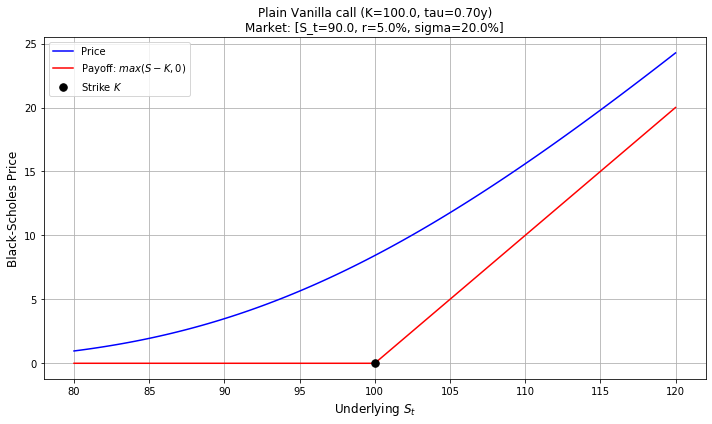

In [100]:
option_plotter.plot()

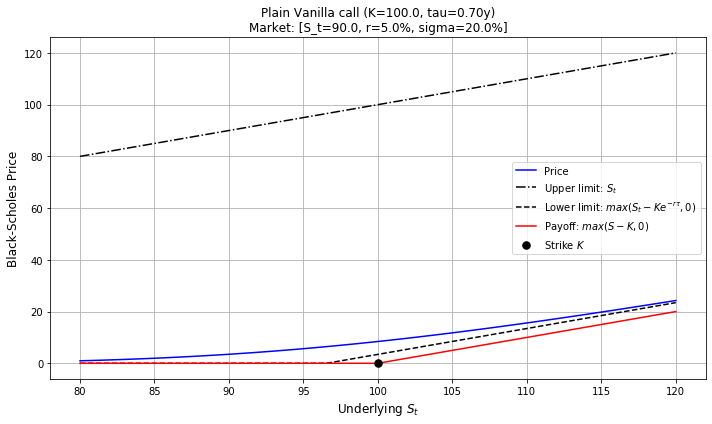

In [101]:
option_plotter.plot(plot_limits=True)

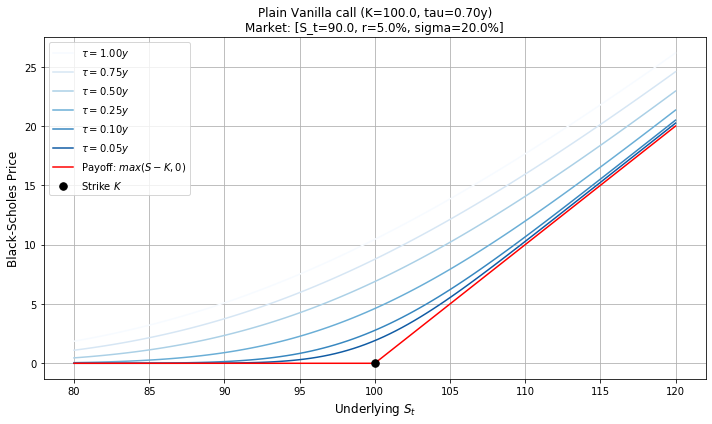

In [102]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.75, 1.0])

In [103]:
CON_Put = DigitalOption(market_env, option_type='put')
CON_Put

Initializing the EuropeanOption!


DigitalOption('put', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [104]:
option_plotter = OptionPlotter(CON_Put)

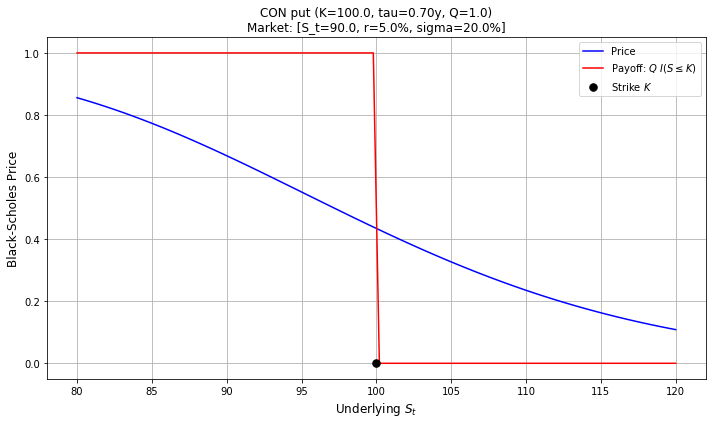

In [105]:
option_plotter.plot()

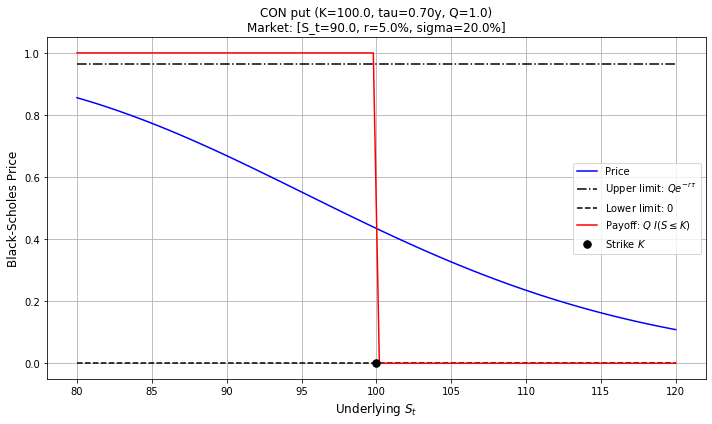

In [106]:
option_plotter.plot(plot_limits=True)

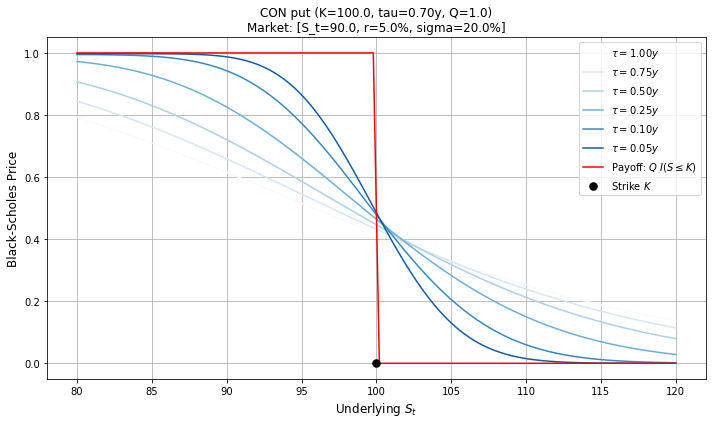

In [107]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.75, 1.0])

## _focus on:_ PnL

In [108]:
class EuropeanOption:
    """
    EuropeanOption abstract class: an interface setting the template for any option with european-style exercise.
    This class is not meant to be instantiated.
    
    Attributes:
    -----------
        type (str):               type of the option. Can be either 'call' or 'put';
        S_t (float):              'S' attribute of mkt_env.
        K (float):                strike price;
        t (str; dt.datetime):     't' attribute of mkt_env.
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                'r' attribute of mkt_env.
        sigma (float):            'sigma' attribute of mkt_env.
    
    Template Methods:
    --------   
    
        getters for all common attributes
        
        setters for common attributes, not belonging to mkt_env
        
        payoff: float
            Template method for payoff. Raises NotImplementedError if called.

        price_upper_limit: float 
            Template method for upper limit. Raises NotImplementedError if called.

        price_lower_limit: float 
            Template method for lower limit. Raises NotImplementedError if called.
            
        price: float
            Template method for price. Raises NotImplementedError if called.
            
        PnL: float
            Template method for profit and loss. Raises NotImplementedError if called.

    """

    def __init__(self, mkt_env, option_type='call', K=100.0, T="31-12-2020"):
        
        print("Initializing the EuropeanOption!")

        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
        
        self.__type  = option_type
        self.__S     = mkt_env.get_S()
        self.__K     = K
        self.__t     = mkt_env.get_t()
        self.__T     = parse_date(T)
        self.__tau   = self.time_to_maturity()
        self.__r     = mkt_env.get_r()
        self.__sigma = mkt_env.get_sigma()
        
        # empty initial price of the option
        self.__initial_price = None
               
        # empty informations dictionary
        self.__docstring_dict = {}        
        
    # string representation method template
    def __repr__(self):
        raise NotImplementedError()
    
    # getters
    def get_type(self):
        return self.__type

    def get_S(self):
        return self.__S
    
    def get_sigma(self):
        return self.__sigma
    
    def get_K(self):
        return self.__K
    
    def get_t(self):
        return self.__t

    def get_T(self):
        return self.__T

    def get_tau(self):
        return self.__tau

    def get_r(self):
        return self.__r
    
    def get_sigma(self):
        return self.__sigma
    
    def get_initial_price(self):
        return NotImplementedError()
    
    # doctring getter template
    def get_docstring(self, label):
        raise NotImplementedError()

    # setters
    def set_type(self, option_type):
        self.__type = option_type
        
        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
            
    def set_K(self, K):
        self.__K = K
    
    def set_T(self, T):
        self.__T = parse_date(T)
        # update time to maturity, given changed T, to keep internal consistency
        self.__update_tau() 
    
    def set_tau(self, tau):
        self.__tau = tau
        # update expiration date, given changed tau, to keep internal consistency
        self.__update_T()
        
    # update methods (private)
    def __update_tau(self):
        self.__tau = self.time_to_maturity()

    def __update_T(self):
        self.__T = self.__t + dt.timedelta(days=math.ceil(self.__tau*365))

    # utility methods
    def time_to_maturity(self, *args, **kwargs):
        """
        Utility method to compute time-to-maturity
        """
        
        # parsing optional parameters
        t = args[0] if len(args) > 0 else kwargs['t'] if 't' in kwargs else self.get_t()
        T = args[1] if len(args) > 1 else kwargs['T'] if 'T' in kwargs else self.get_T()
        
        # convert to dt.datetime objects, if needed
        t = parse_date(t)
        T = parse_date(T)
        
        # compute and return time to maturity (in years)
        return (T-t).days / 365.0
    
    def parse_S_tau_parameters(self, *args, **kwargs):
        """
        Utility method to parse underlying and time-parameters
        """

        # underlying value 
        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()

        # time parameter:
        time_param = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else (kwargs['t'] if 't' in kwargs else None)

        # time parameter interpretation according to its type        
        # case 1: no time-parameter in input
        if time_param is None:
            tau = self.get_tau()
        # case 2: valid time-to-maturity in input
        elif isinstance(time_param, int) or isinstance(time_param, float):
            tau = time_param
        # case 3: valuation date in input, to be converted into time-to-maturity
        elif isinstance(time_param, str) or isinstance(time_param, dt.datetime):
            valuation_date = parse_date(time_param)
            tau = self.time_to_maturity(t=valuation_date)
        # error case: the time parameter in input has a data-type that is not recognized
        else: 
            raise TypeError("Type {} of input time parameter not recognized".format(type(time_param)))

        return S, tau
    
    # payoff template
    def payoff(self):
        raise NotImplementedError()     
        
    # upper price limit template
    def price_upper_limit(self):
        raise NotImplementedError()     

    # lower price limit template
    def price_lower_limit(self):
        raise NotImplementedError()     
        
    # price template
    def price(self):
        raise NotImplementedError()
        
    # profit and loss calculation calculation - with optional *args and **kwargs parameters
    def PnL(self, *args, **kwargs):
        """
        Can be called as:
            - PnL(): uses .get_S() and .get_tau()
            - PnL(100.0): S == 100.0
            - PnL(100.0, 0.1): S == 100.0 and tau == 0.1
            - PnL(S=100.0, tau=0.1)
            - PnL([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - PnL(S=[100.0, ..., 120.0], tau=0.1)
        """
        
        # underlying value and time-to-maturity
        S, tau = self.parse_S_tau_parameters(*args, **kwargs)
        
        # if tau==0, this is the P&L at option's expiration, that is the PnL if the option is kept until maturity
        if tau == 0.0:
            # P&L = payoff - initial price
            return self.payoff(S) - self.get_initial_price()
        
        # if tau > 0, this is the P&L as if the option position is closed before maturity, when the time-to-maturity is tau
        else:
            # P&L = current price - initial price
            return self.price(S, tau) - self.get_initial_price()

In [109]:
class PlainVanillaOption(EuropeanOption):
    """
    PlainVanillaOption class implementing payoff and pricing of plain-vanilla call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        mkt_env (MarketEnvironment): Instance of MarketEnvironment class
        type (str):                  From 'type' attribute of EuropeanOption base class.
        S_t (float):                 'S' attribute of mkt_env.
        K (float):                   From 'K' attribute of EuropeanOption base class.
        t (str; dt.datetime):        't' attribute of mkt_env.
        T (str; dt.datetime):        From 'T' attribute of EuropeanOption base class.
        tau (float):                 time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                   'r' attribute of mkt_env.
        sigma (float):               'sigma' attribute of mkt_env.
    
    Public Methods:
    --------   
    
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla option price.
            
        price: float
            Computes the exact price of the option and returns it
            
    Usage: 
    --------   
        - default: PlainVanillaOption(mkt_env) is equivalent to 
                   PlainVanillaOption(mkt_env, option_type='call', K=100.0, T="31-12-2020")

        - general: PlainVanillaOption(mkt_env, option_type='call' or 'put' String, K=Float, T="DD-MM-YYYY" String)

    where: mkt_env is a MarketEnvironment instance.
    """
    
    # initializer with optional *args and **kwargs parameters
    def __init__(self, *args, **kwargs):  
        
        # calling the EuropeanOption constructor
        super(PlainVanillaOption, self).__init__(*args, **kwargs)
        
        # info strings
        self.__info = r"Plain Vanilla {} (K={:.1f}, tau={:.2f}y)".format(self.get_type(), self.get_K(), self.get_tau())
        self.__mkt_info = r"[S_t={:.1f}, r={:.1f}%, sigma={:.1f}%]".format(self.get_S(), self.get_r()*100, self.get_sigma()*100)
        
        # initial price of the option
        self.__initial_price = self.price()
        
        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $S_t$",
                'payoff':            r"Payoff: $max(S-K, 0)$",
                'price_lower_limit': r"Lower limit: $max(S_t - K e^{-r \tau}, 0)$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $K e^{-r \tau}$",
                'payoff':            r"Payoff: $max(K-S, 0)$",
                'price_lower_limit': r"Lower limit: $max(K e^{-r \tau} - S_t, 0)$"}
        }
                
    def __repr__(self):
        return r"PlainVanillaOption('{}', S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_info(self):
        return self.__info
    
    def get_mkt_info(self):
        return self.__mkt_info
    
    def get_initial_price(self):
        return self.__initial_price

    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label] 
    
    # payoff calculation - with optional *args and **kwargs parameters
    def payoff(self, *args, **kwargs):
        """
        Can be called as:
            - payoff(): uses .get_S() 
            - payoff(100.0): S == 100.0
            - payoff(S=100.0)
            - payoff([100.0, ..., 120.0]): S == [100.0, ..., 120.0] 
            - payoff(S=[100.0, ..., 120.0])
        """
        
        # underlying value
        S, _ = self.parse_S_tau_parameters(*args, **kwargs)
                
        # call case
        if self.get_type() == 'call':
            return self.__call_payoff(S)
        # put case
        else:
            return self.__put_payoff(S)
    
    def __call_payoff(self, S):
        if isinstance(S, Iterable):
            return np.array([max(0.0, s - self.get_K()) for s in S])
        else:
            return max(0.0, S - self.get_K())

    def __put_payoff(self, S):
        if isinstance(S, Iterable):
            return np.array([max(0.0, self.get_K() - s) for s in S])
        else:
            return max(0.0, self.get_K() - S)
        
    # upper price limit - with optional *args and **kwargs parameters
    def price_upper_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_upper_limit(): uses .get_S() and .get_tau()
            - price_upper_limit(100.0): S == 100.0
            - price_upper_limit(100.0, 0.1): S == 100.0 and tau == 0.1
            - price_upper_limit(S=100.0, tau=0.1)
            - price_upper_limit([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price_upper_limit(S=[100.0, ..., 120.0], tau=0.1)
        """

        # underlying value and time-to-maturity
        S, tau = self.parse_S_tau_parameters(*args, **kwargs)
                        
        # call case
        if self.get_type() == 'call':
            return S
        # put case
        else:
            return self.__put_price_upper_limit(S, tau)
    
    def __put_price_upper_limit(self, S, tau):
        if isinstance(S, Iterable):
            return np.repeat(self.get_K()*np.exp(-self.get_r() * tau), repeats=len(S)) 
        else:
            return self.get_K()*np.exp(-self.get_r() * tau)

    # lower price limit - with optional *args and **kwargs parameters
    def price_lower_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_lower_limit(): uses .get_S() and .get_tau()
            - price_lower_limit(100.0): S == 100.0
            - price_lower_limit(100.0, 0.1): S == 100.0 and tau == 0.1
            - price_lower_limit(S=100.0, tau=0.1)
            - price_lower_limit([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price_lower_limit(S=[100.0, ..., 120.0], tau=0.1)
        """

        # underlying value and time-to-maturity
        S, tau = self.parse_S_tau_parameters(*args, **kwargs)
                                       
        # call case
        if self.get_type() == 'call':
            return self.__call_price_lower_limit(S, tau)
        # put case
        else:
            return self.__put_price_lower_limit(S, tau)

    def __call_price_lower_limit(self, S, tau):
        if isinstance(S, Iterable):
            return np.array([max(s - self.get_K()*np.exp(-self.get_r() * tau), 0.0) for s in S])
        else:
            return max(S - self.get_K()*np.exp(-self.get_r() * tau), 0.0)
                                       
    def __put_price_lower_limit(self, S, tau):
        if isinstance(S, Iterable):
            return np.array([max(self.get_K()*np.exp(-self.get_r() * tau) - s, 0.0) for s in S])
        else:
            return max(self.get_K()*np.exp(-self.get_r() * tau) - S, 0.0)
                                       
    # price calculation - with optional *args and **kwargs parameters
    def price(self, *args, **kwargs):
        """
        Can be called as:
            - price(): uses .get_S() and .get_tau()
            - price(100.0): S == 100.0
            - price(100.0, 0.1): S == 100.0 and tau == 0.1
            - price(S=100.0, tau=0.1)
            - price([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price(S=[100.0, ..., 120.0], tau=0.1)
        """
                       
        # underlying value and time-to-maturity
        S, tau = self.parse_S_tau_parameters(*args, **kwargs)
               
        # call case
        if self.get_type() == 'call':
            return np.array([self.__call_price(s, tau) for s in S]) if isinstance(S, Iterable) else self.__call_price(S, tau)
        # put case
        else:
            return np.array([self.__put_price(s, tau) for s in S]) if isinstance(S, Iterable) else self.__put_price(S, tau)
          
    def __call_price(self, S, tau):
        
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        elif tau == 0.0: # this is to avoid 0/0 issues
            return self.__call_payoff(S)
        else:
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = S * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self, S, tau):
        """ Put price from Put-Call parity relation: Call + Ke^{-r*tau} = Put + S"""
        return self.__call_price(S, tau) + self.get_K() * np.exp(- self.get_r() * tau) - S     

In [110]:
class DigitalOption(EuropeanOption):
    """
    DigitalOption class implementing payoff and pricing of digital call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        mkt_env (MarketEnvironment): Instance of MarketEnvironment class
        Q (float):                   cash amount
        type (str):                  From 'type' attribute of EuropeanOption base class.
        S_t (float):                 'S' attribute of mkt_env.
        K (float):                   From 'K' attribute of EuropeanOption base class.
        t (str; dt.datetime):        't' attribute of mkt_env.
        T (str; dt.datetime):        From 'T' attribute of EuropeanOption base class.
        tau (float):                 time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                   'r' attribute of mkt_env.
        sigma (float):               'sigma' attribute of mkt_env.
    
    Public Methods:
    --------   
    
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla option price.
            
        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    Usage: 
    --------   
        - default: DigitalOption(mkt_env) is equivalent to 
                   DigitalOption(mkt_env, cash_amount=1.0, option_type='call', K=100.0, T="31-12-2020")

        - general: DigitalOption(mkt_env, cash_amount=Float, option_type='call' or 'put' String, K=Float, T="DD-MM-YYYY" String)

    where: mkt_env is a MarketEnvironment instance.
    """

    # initializer with optional *args and **kwargs parameters and default cash_amount
    # default keyword arguments (like cash_amount here) must go after args list argument in function def
    def __init__(self, *args, cash_amount=1.0, **kwargs):  
        
        # calling the EuropeanOption constructor
        super(DigitalOption, self).__init__(*args, **kwargs)
        
        # amount of cash in case of payment
        self.__Q = cash_amount    
        
        # info strings
        self.__info = r"CON {} (K={:.1f}, tau={:.2f}y, Q={:.1f})".format(self.get_type(), self.get_K(), self.get_tau(), self.get_Q())
        self.__mkt_info = r"[S_t={:.1f}, r={:.1f}%, sigma={:.1f}%]".format(self.get_S(), self.get_r()*100, self.get_sigma()*100)
        
        # initial price of the option
        self.__initial_price = self.price()

        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S > K)$",
                'price_lower_limit': r"Lower limit: $0$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S \leq K)$",
                'price_lower_limit': r"Lower limit: $0$"}
        }        
                
    def __repr__(self):
        return r"DigitalOption('{}', cash={:.1f}, S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_Q(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_info(self):
        return self.__info
    
    def get_mkt_info(self):
        return self.__mkt_info
    
    def get_Q(self):
        return self.__Q
    
    def get_initial_price(self):
        return self.__initial_price
    
    # docstring getter
    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label] 
    
    # setters
    def set_Q(self, cash_amount):
        self.__Q = cash_amount
    
    # payoff calculation - with optional *args and **kwargs parameters
    def payoff(self, *args, **kwargs):
        """
        Can be called as:
            - payoff(): uses .get_S() 
            - payoff(100.0): S == 100.0
            - payoff(S=100.0)
            - payoff([100.0, ..., 120.0]): S == [100.0, ..., 120.0] 
            - payoff(S=[100.0, ..., 120.0])
        """
        
        # underlying value
        S, _ = self.parse_S_tau_parameters(*args, **kwargs)
        
        # call case
        if self.get_type() == 'call':
            return self.__call_payoff(S)
        # put case
        else:
            return self.__put_payoff(S)

    def __call_payoff(self, S):
        if isinstance(S, Iterable):
            return np.array([self.get_Q() * int(s > self.get_K()) for s in S])
        else:
            return self.get_Q() * int(S > self.get_K())

    def __put_payoff(self, S):
        if isinstance(S, Iterable):
            return np.array([self.get_Q() * int(s <= self.get_K()) for s in S])
        else:
            return self.get_Q() * int(S <= self.get_K())
        
    # upper price limit - with optional *args and **kwargs parameters
    def price_upper_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_upper_limit(): uses .get_S() and .get_tau()
            - price_upper_limit(100.0): S == 100.0
            - price_upper_limit(100.0, 0.1): S == 100.0 and tau == 0.1
            - price_upper_limit(S=100.0, tau=0.1)
            - price_upper_limit([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price_upper_limit(S=[100.0, ..., 120.0], tau=0.1)
        """

        # underlying value and time-to-maturity
        S, tau = self.parse_S_tau_parameters(*args, **kwargs)
            
        # the same for call and put
        return self.__price_upper_limit(S, tau)
 
    def __price_upper_limit(self, S, tau):
        if isinstance(S, Iterable):
            return np.repeat(self.get_Q()*np.exp(-self.get_r() * tau), repeats=len(S))
        else:
            return self.get_Q()*np.exp(-self.get_r() * tau)
                                       
    # lower price limit - with optional *args and **kwargs parameters
    def price_lower_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_lower_limit(): uses .get_S() 
            - price_lower_limit(100.0): S == 100.0
            - price_lower_limit(S=100.0)
            - price_lower_limit([100.0, ..., 120.0]): S == [100.0, ..., 120.0] 
            - price_lower_limit(S=[100.0, ..., 120.0])
        """

        # underlying value
        S, _ = self.parse_S_tau_parameters(*args, **kwargs)
            
        # call case
        if self.get_type() == 'call':
            return np.repeat(0.0, repeats=len(S)) if isinstance(S, Iterable) else 0.0
        # put case
        else:
            return np.repeat(0.0, repeats=len(S)) if isinstance(S, Iterable) else 0.0
        
    # price calculation - with optional *args and **kwargs parameters
    def price(self, *args, **kwargs):
        """
        Can be called as:
            - price(): uses .get_S() and .get_tau()
            - price(100.0): S == 100.0
            - price(100.0, 0.1): S == 100.0 and tau == 0.1
            - price(S=100.0, tau=0.1)
            - price([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price(S=[100.0, ..., 120.0], tau=0.1)
        """
                       
        # underlying value and time-to-maturity
        S, tau = self.parse_S_tau_parameters(*args, **kwargs)
            
        # call case
        if self.get_type() == 'call':
            return np.array([self.__call_price(s, tau) for s in S]) if isinstance(S, Iterable) else self.__call_price(S, tau)
        # put case
        else:
            return np.array([self.__put_price(s, tau) for s in S]) if isinstance(S, Iterable) else self.__put_price(S, tau)
          
    def __call_price(self, S, tau):
                
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        elif tau == 0.0: # this is to avoid 0/0 issues
            return self.__call_payoff(S)
        else:
            Q     = self.get_Q()
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = Q * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self, S, tau):
        """ Put price from Put-Call parity relation: CON_Call + CON_Put = Qe^{-r*tau}"""
        return self.get_Q() * np.exp(- self.get_r() * tau) - self.__call_price(S, tau)        

In [111]:
Vanilla_Call = PlainVanillaOption(market_env)
Vanilla_Call

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [112]:
Vanilla_Call.price()

3.487402470943657

In [113]:
Vanilla_Call.payoff()

0.0

In [114]:
Vanilla_Call.PnL()

0.0

In [115]:
Vanilla_Call.PnL(tau=0)

-3.487402470943657

In [116]:
Vanilla_Call.get_K()

100.0

In [117]:
Vanilla_Call.PnL(S=110, tau=0)

6.512597529056343

`getattr` 

In [118]:
getattr(Vanilla_Call, 'price')()

3.487402470943657

In [119]:
str(getattr(Vanilla_Call, 'PnL'))

"<bound method EuropeanOption.PnL of PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)>"

In [120]:
getattr(Vanilla_Call, 'PnL')()

0.0

In [121]:
class OptionPlotter:
    
    def __init__(self, FinancialInstrument):

        # parse informations from FinancialInstrument
        self.fin_inst = FinancialInstrument
        self.__title_label = self.fin_inst.get_info() + "\n" + "Market: " + self.fin_inst.get_mkt_info()

        # define x-axis 
        self.set_x_axis(self.fin_inst.get_K())

        # define time(s)-to-maturity
        self.set_tau(self.fin_inst.get_tau())
        
    # getters
    def get_x_axis(self):
        return self.__x_axis

    def get_tau(self):
        return self.__tau

    def get_title(self):
        return self.__title_label
    
    # setters
    def set_x_axis(self, x):
        
        if isinstance(x, Iterable):
            self.__x_axis = x
        else:
            x_min = max(x-20, 0.0)
            x_max = x+20
            
            self.__x_axis = np.linspace(x_min, x_max, 100)
    
    def set_tau(self, tau):
        if isinstance(tau, Iterable) and len(tau) > 1:
            # sort and take the reversed array
            self.__tau = np.sort(tau)[::-1]
        elif isinstance(tau, Iterable) and len(tau) == 1:
            self.__tau = tau[0]
        else:
            self.__tau = tau
                    
    def plot(self, *args, method_name='price', **kwargs):
        
        # parse optional parameters
        if len(args) > 0:
            self.set_x_axis(args[0])
        elif 'S' in kwargs:
            self.set_x_axis(kwargs['S'])
            
        if len(args) > 1:
            self.set_tau(args[1])
        elif 'tau' in kwargs:
            self.set_tau(kwargs['tau'])
            
        # get x-axis and, possibly, multi-tau
        x_axis = self.get_x_axis()
        tau = self.get_tau()
        
        if isinstance(tau, Iterable):
            self.__plot_multi_tau(x_axis, tau, method_name)
        else:
            plot_limits = args[2] if len(args) > 2 else kwargs['plot_limits'] if 'plot_limits' in kwargs else False
            self.__plot_single_tau(x_axis, tau, plot_limits, method_name)
            
    def __plot_multi_tau(self, S, multi_tau, method_name):
        """
        Plot FinancialInstrument values against underlying value(s), possibly at multiple times-to-maturity.
        """
        
        plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(multi_tau))))

        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))

        # plot the price for different underlying values, one line for each different time to maturity tau
        for tau in multi_tau:

            ax.plot(S, getattr(self.fin_inst, method_name)(S, tau), '-', lw=1.5, label=r"$\tau={:.2f}y$".format(tau))

        # blue dot at original underlying level for reference, one dot for each different time to maturity tau
        for tau in multi_tau:
            S_t = self.fin_inst.get_S()
            ax.plot(S_t, getattr(self.fin_inst, method_name)(S_t, tau), '.', ms=10, 
                    label=r"$\tau={:.2f}y$ at $S={:.1f}$".format(tau, S_t))
            
        # plot the red payoff line for different underlying values
        if method_name == 'PnL':
            ax.plot(S, self.fin_inst.PnL(S, tau=0.0), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff') + r" (net of initial price)")
        else:
            ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff'))

        # plot a dot to highlight the strike position and a reference zero line
        ax.plot(self.fin_inst.get_K(), 0, 'k.', ms=15, label="Strike $K$")
        ax.plot(S, np.zeros_like(S), 'k--', lw=1.5)
        
        # set axis labels 
        ax.set_xlabel(r"Underlying Value at different times-to-maturity $\tau$", fontsize=12)
        ax.set_ylabel('Black-Scholes {}'.format(method_name), fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=2)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()
    
    def __plot_single_tau(self, S, tau, plot_limits, method_name):
        """
        Plot FinancialInstrument values against underlying value(s) at fixed time-to-maturity. Optionally, it plots theoretical
        upper and lower bounds of the price.
        """

        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))
        
        # plot the price for different underlying values
        if tau > 0:
            ax.plot(S, getattr(self.fin_inst, method_name)(S, tau), 'b-', lw=1.5, label=method_name)
        
        # blue dot at original underlying level for reference
        S_t = self.fin_inst.get_S()
        ax.plot(S_t, getattr(self.fin_inst, method_name)(S_t, tau), 'b.', ms=15, 
                label=method_name + r" at $S={:.1f}$".format(S_t))
        
        if plot_limits==True:
            # plot the upper limit, the price and the lower limit for different underlying values
            ax.plot(S, self.fin_inst.price_upper_limit(S, tau), 'k-.', lw=1.5, label=self.fin_inst.get_docstring('price_upper_limit'))
            ax.plot(S, self.fin_inst.price_lower_limit(S, tau), 'k--', lw=1.5, label=self.fin_inst.get_docstring('price_lower_limit'))

        # plot the red payoff line for different underlying values
        if method_name == 'PnL':
            ax.plot(S, self.fin_inst.PnL(S, tau=0.0), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff') + r" (net of initial price)")
        else:
            ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff'))

        # plot a dot to highlight the strike position and a reference zero line
        ax.plot(self.fin_inst.get_K(), 0, 'k.', ms=15, label="Strike $K$")
        ax.plot(S, np.zeros_like(S), 'k--', lw=1.5)

        # set axis labels 
        ax.set_xlabel(r"Underlying Value at time-to-maturity $\tau={:.2f}y$".format(tau), fontsize=12) 
        ax.set_ylabel('Black-Scholes {}'.format(method_name), fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=1)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()

In [122]:
market_env

MarketEnvironment(t=19-04-2020, r=5.0%, S_t=90.0, sigma=20.0%)

In [123]:
Vanilla_Call

PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [124]:
option_plotter = OptionPlotter(Vanilla_Call)

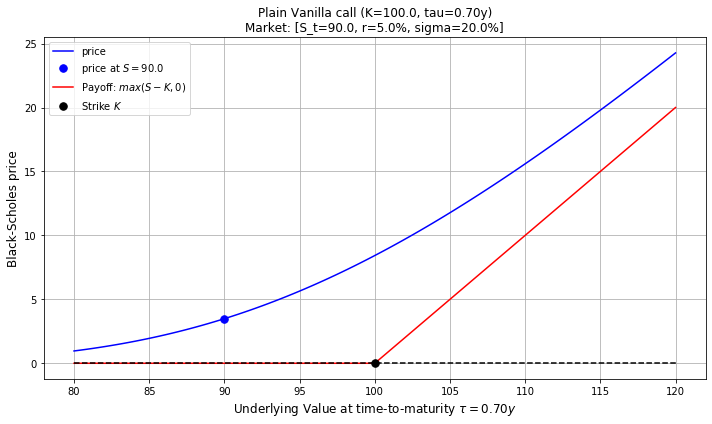

In [125]:
option_plotter.plot()

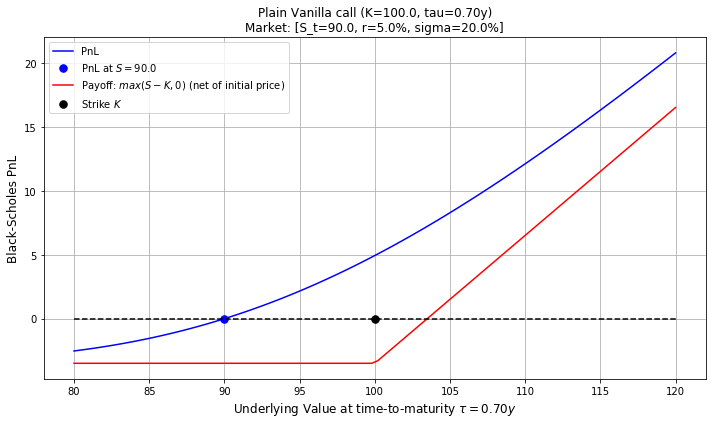

In [126]:
option_plotter.plot(method_name='PnL')

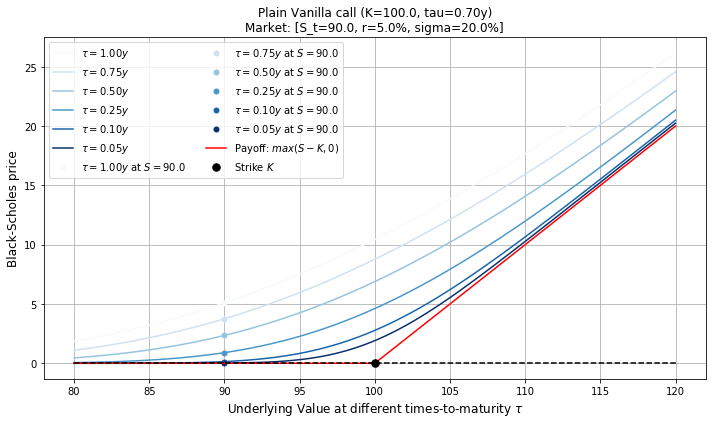

In [127]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.75, 1.0])

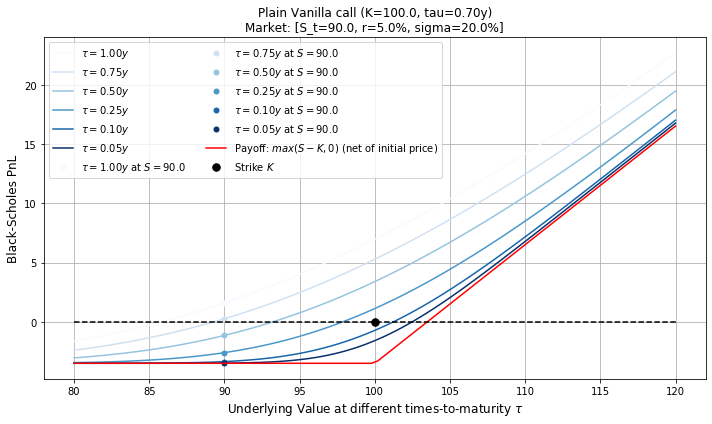

In [128]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.75, 1.0], method_name='PnL')

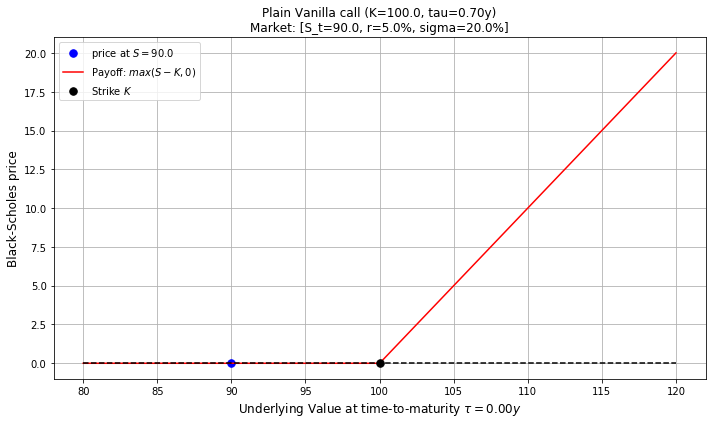

In [129]:
option_plotter.plot(tau=0.0)

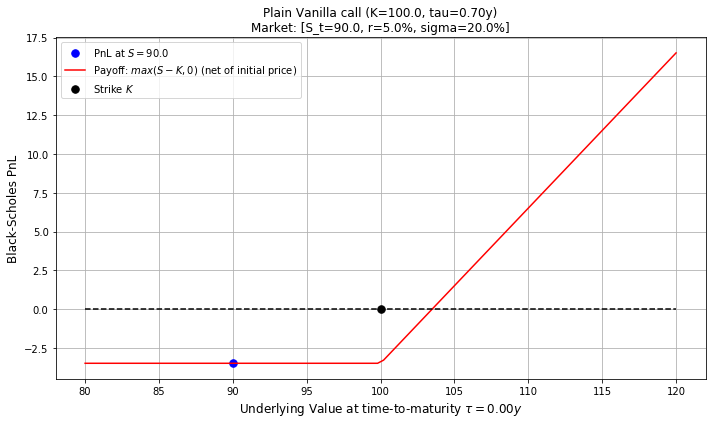

In [130]:
option_plotter.plot(tau=0.0, method_name='PnL')

In [131]:
CON_Call = DigitalOption(market_env)
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [132]:
option_plotter = OptionPlotter(CON_Call)

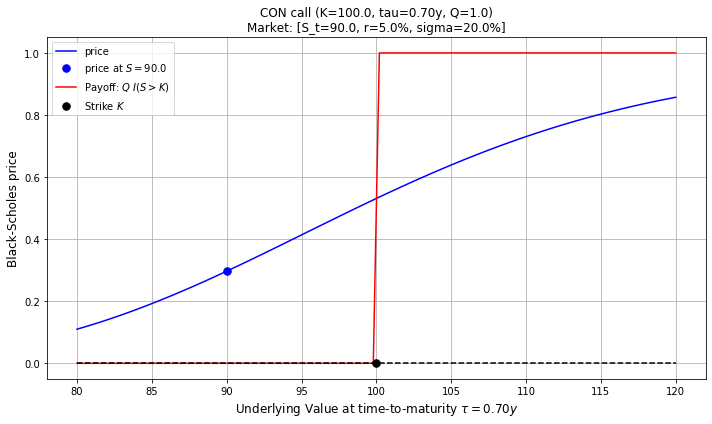

In [133]:
option_plotter.plot()

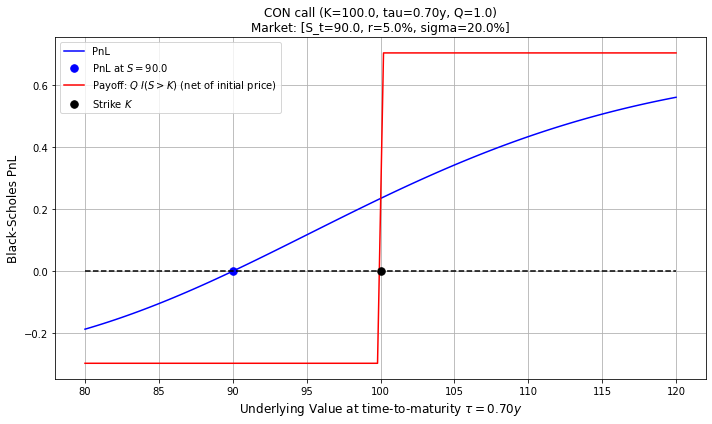

In [134]:
option_plotter.plot(method_name='PnL')

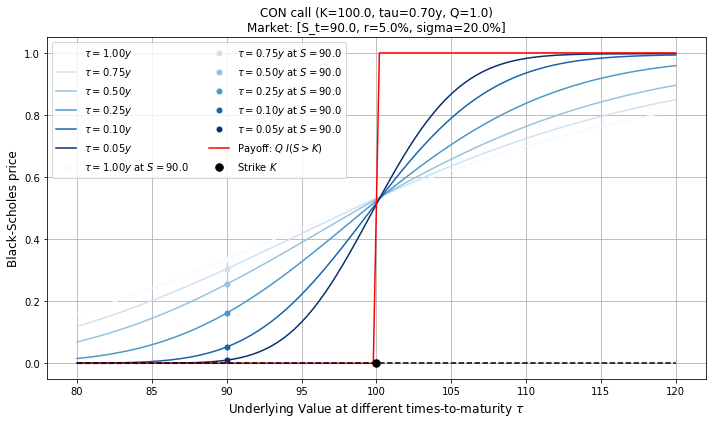

In [135]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.75, 1.0])

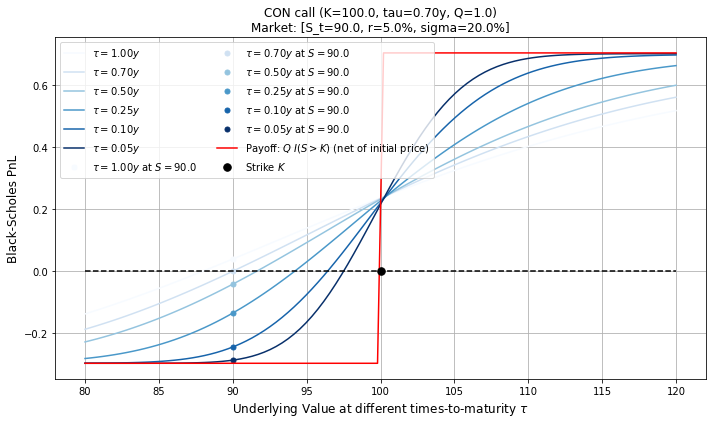

In [136]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.7, 1.0], method_name='PnL')

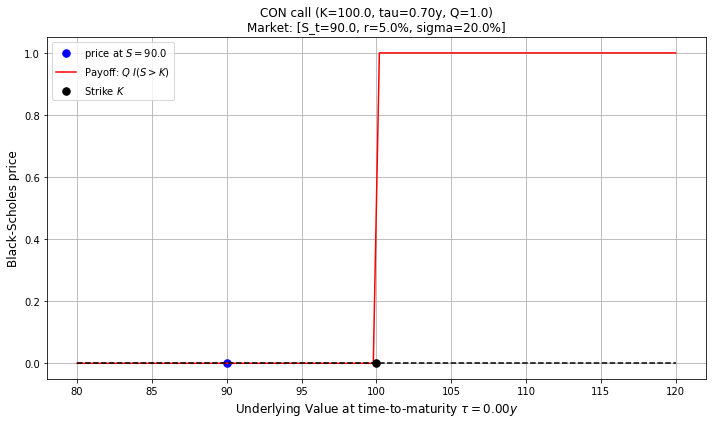

In [137]:
option_plotter.plot(tau=0.0)

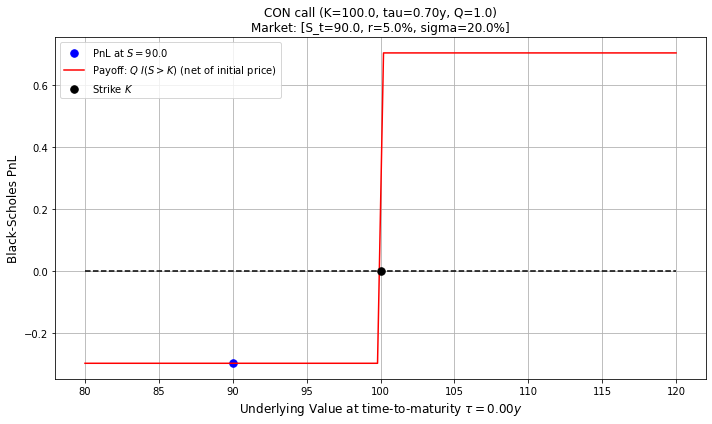

In [138]:
option_plotter.plot(tau=0.0, method_name='PnL')

# Composition application: a `Portfolio()` class

- OptionStrategy() single tau (sfruttare *args **kwargs)

- riesci a fare plot multi-tau?

Notice the use of `*args` `**kwargs` optional arguments in portfolio's analytics methods. We are letting the input parameters smoothly flow trough the portfolio interface and delegating to the payoff and price methods of the single instruments, the parsing operations or the parameters. This is analogous to what we have done in sub-class initialization

In [139]:
class Portfolio:
    
    def __init__(self, name="Dummy"):
        
        # initialize an empty portfolio
        self.__composition = []
        
        # initialize empty info strings
        self.__info = "{} Portfolio: \n".format(name)
        self.__mkt_info = None
        
        # initialize underlying value, strikes and times-to-maturity attributes
        self.__S = None
        self.__K = np.array([])
        self.__tau = np.array([])
        
    def __repr__(self):
        return self.get_info()
    
    # getters
    def get_info(self):
        return self.__info
    
    def get_mkt_info(self):
        return self.__mkt_info
    
    def get_K(self):
        return self.__K
    
    def get_S(self):
        return self.__S

    def get_tau(self):
        return self.__tau
    
    def get_composition(self):
        return self.__composition
    
    # setters
    def set_S(self, S):
        self.__S = S
    
    # composition method
    def add_instrument(self, FinancialInstrument, position):
        
        long_short = 'Long' if position > 0 else 'Short'
        instrument_info = long_short + " {} ".format(abs(position)) + FinancialInstrument.get_info()
        
        self.__composition.append({"instrument": FinancialInstrument,
                                   "position":   position,
                                   "info":       instrument_info})
        
        # update portfolio info strings
        self.__update_info(FinancialInstrument, position)
        
        # update portfolio attributes
        self.__update_S(FinancialInstrument)
        self.__update_K(FinancialInstrument)
        self.__update_tau(FinancialInstrument)
    
    # private method to update the info
    def __update_info(self, fin_inst, pos):
        self.__info += self.__composition[-1]["info"] + "\n"
        if self.__mkt_info is None:
            self.__mkt_info = fin_inst.get_mkt_info()
            
    def __update_S(self, fin_inst):
        if self.get_S() is None:
            self.set_S(fin_inst.get_S())

            
    def __update_K(self, fin_inst):
        # append new instrument strike
        strikes = np.append(self.get_K(), fin_inst.get_K())
        # filter only distinct strikes
        self.__K = np.unique(strikes)

    def __update_tau(self, fin_inst):
        # append new instrument tau
        times_to_maturity = np.append(self.get_tau(), fin_inst.get_tau())
        # filter only distinct times-to-maturity
        self.__tau = np.unique(times_to_maturity)
                
    # portfolio "payoff", that is expiration value
    def payoff(self, *args, **kwargs):
        """
        Returns the portfolio payoff as the scalar product (i.e. sum of elementwise products) 
        between single instrument payoffs and positions.
        
        As single instruments .payoff(), can be called with single/multiple 'S' and single 'tau'. 
        """
              
        if self.get_composition(): 

            # single instrument payoffs and positions
            payoffs = np.array([inst["instrument"].payoff(*args, **kwargs) for inst in self.get_composition()])
            positions = np.array([inst["position"] for inst in self.get_composition()])
            
            return positions.dot(payoffs)
            
        else: # if portfolio is empty returns 0
            
            return 0.0  
        
    # portfolio value (called 'price' as for single options, to implement polymorphism)
    def price(self, *args, **kwargs):
        """
        Returns the portfolio value as the scalar product (i.e. sum of elementwise products) 
        between single instrument prices and positions.
        
        As single instruments .price(), can be called with single/multiple 'S' and single 'tau'. 
        """
        
        if self.get_composition(): 

            # single instrument prices and positions
            prices = np.array([inst["instrument"].price(*args, **kwargs) for inst in self.get_composition()])
            positions = np.array([inst["position"] for inst in self.get_composition()])
            
            return positions.dot(prices)
            
        else: # if portfolio is empty returns 0
            
            return 0.0  
        
    # portfolio P&L
    def PnL(self, *args, **kwargs):
        """
        Returns the portfolio Profit & Loss as the scalar product (i.e. sum of elementwise products) 
        between single instrument P&Ls and positions.
        
        As single instruments .PnL(), can be called with single/multiple 'S' and single 'tau'. 
        """
                
        if self.get_composition(): 

            # single instrument P&Ls and positions
            pnls = np.array([inst["instrument"].PnL(*args, **kwargs) for inst in self.get_composition()])
            positions = np.array([inst["position"] for inst in self.get_composition()])
            
            return positions.dot(pnls)
            
        else: # if portfolio is empty returns 0
            
            return 0.0  


In [140]:
Vanilla_Call = PlainVanillaOption(market_env)
Vanilla_Call

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [141]:
dummy_ptf = Portfolio()
dummy_ptf

Dummy Portfolio: 

In [142]:
dummy_ptf.add_instrument(Vanilla_Call, 1)

In [143]:
dummy_ptf

Dummy Portfolio: 
Long 1 Plain Vanilla call (K=100.0, tau=0.70y)

In [144]:
Vanilla_Call.get_S()

90.0

In [145]:
dummy_ptf.get_S()

90.0

In [146]:
Vanilla_Call.get_K()

100.0

In [147]:
dummy_ptf.get_K()

array([100.])

In [148]:
Vanilla_Call.get_tau()

0.7013698630136986

In [149]:
dummy_ptf.get_tau()

array([0.70136986])

In [150]:
Vanilla_Call.price()

3.487402470943657

In [151]:
dummy_ptf.price()

3.487402470943657

Let's now add a short position on 5 plain-vanilla put option contracts to our portfolio

In [152]:
put_strike = Vanilla_Call.get_K() + 20

In [153]:
Vanilla_Put = PlainVanillaOption(market_env, option_type='put', K=put_strike)
Vanilla_Put

Initializing the EuropeanOption!


PlainVanillaOption('put', S_t=90.0, K=120.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [154]:
dummy_ptf.add_instrument(Vanilla_Put, -5)

In [155]:
dummy_ptf

Dummy Portfolio: 
Long 1 Plain Vanilla call (K=100.0, tau=0.70y)
Short 5 Plain Vanilla put (K=120.0, tau=0.70y)

In [156]:
Vanilla_Put.get_S()

90.0

In [157]:
dummy_ptf.get_S()

90.0

In [158]:
Vanilla_Put.get_K()

120.0

In [159]:
dummy_ptf.get_K()

array([100., 120.])

In [160]:
Vanilla_Put.get_tau()

0.7013698630136986

In [161]:
dummy_ptf.get_tau()

array([0.70136986])

In [162]:
dummy_ptf.payoff()

-150.0

In [163]:
1 * Vanilla_Call.payoff() - 5 * Vanilla_Put.payoff() 

-150.0

In [164]:
dummy_ptf.price()

-128.28989284676607

In [165]:
1 * Vanilla_Call.price() - 5 * Vanilla_Put.price() 

-128.28989284676607

In [166]:
dummy_ptf.PnL()

0.0

In [167]:
1 * Vanilla_Call.PnL() - 5 * Vanilla_Put.PnL() 

0.0

You can call with input parameters

In [168]:
S = Vanilla_Call.get_S()
S_12 = [0.8*S, 1.2*S]
S_12

[72.0, 108.0]

In [169]:
tau_short = 0.01
tau_short

0.01

In [170]:
dummy_ptf.PnL(S=S_12, tau=tau_short)

array([-111.41018214,   76.63983107])

In [171]:
1 * Vanilla_Call.PnL(S=S_12, tau=tau_short) - 5 * Vanilla_Put.PnL(S=S_12, tau=tau_short) 

array([-111.41018214,   76.63983107])

## 0. Association: a `Plotter()` class

In [172]:
class Plotter:
    """
    Interface Plotter class
    """
    
    def __init__(self, FinancialObject):
        
        print("Calling the Plotter initializer!")
        
        # parse informations from FinancialObject
        self.fin_inst = FinancialObject
        self.__title_label = self.fin_inst.get_info() + "\n" + "Market: " + self.fin_inst.get_mkt_info()
        
        # define x-axis 
        self.set_x_axis(self.fin_inst.get_K())

        # parse time(s)-to-maturity
        self.set_tau(self.fin_inst.get_tau())
        
    # getters
    def get_x_axis(self):
        return self.__x_axis
        
    def get_tau(self):
        return self.__tau

    def get_title(self):
        return self.__title_label
            
    # setter template for the x-axis 
    def set_x_axis(self, x):
        
        if isinstance(x, Iterable):
            x_min = max(min(x)-20, 0.0)
            x_max = max(x)+20
        else:
            x_min = max(x-20, 0.0)
            x_max = x+20
            
        self.__x_axis = np.linspace(x_min, x_max, 100)
        
    def set_tau(self, tau):
        if isinstance(tau, Iterable) and len(tau) > 1:
            # sort and take the reversed array
            self.__tau = np.sort(tau)[::-1]
        elif isinstance(tau, Iterable) and len(tau) == 1:
            self.__tau = tau[0]
        else:
            self.__tau = tau
     
    # template plot method
    def plot(self):
        raise NotImplementedError()

In [173]:
class OptionPlotter(Plotter):
    """
    Plotter class for single options
    """
    
    def __init__(self, *args, **kwargs):
        # calling the Plotter constructor
        super(OptionPlotter, self).__init__(*args, **kwargs)
                            
    def plot(self, *args, method_name='price', **kwargs):
        
        # parse optional parameters
        if len(args) > 0:
            self.set_x_axis(args[0])
        elif 'S' in kwargs:
            self.set_x_axis(kwargs['S'])
            
        if len(args) > 1:
            self.set_tau(args[1])
        elif 'tau' in kwargs:
            self.set_tau(kwargs['tau'])
            
        # get x-axis and, possibly, multi-tau
        x_axis = self.get_x_axis()
        tau = self.get_tau()
        
        if isinstance(tau, Iterable):
            self.__plot_multi_tau(x_axis, tau, method_name)
        else:
            plot_limits = args[2] if len(args) > 2 else kwargs['plot_limits'] if 'plot_limits' in kwargs else False
            self.__plot_single_tau(x_axis, tau, plot_limits, method_name)
            
    def __plot_multi_tau(self, S, multi_tau, method_name):
        """
        Plot FinancialInstrument values against underlying value(s), possibly at multiple times-to-maturity.
        """
        
        plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(multi_tau))))

        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))

        # plot the price for different underlying values, one line for each different time to maturity tau
        for tau in multi_tau:
            ax.plot(S, getattr(self.fin_inst, method_name)(S, tau), '-', lw=1.5, label=r"$\tau={:.2f}y$".format(tau))

        # blue dot at original underlying level for reference, one dot for each different time to maturity tau
        for tau in multi_tau:
            S_t = self.fin_inst.get_S()
            ax.plot(S_t, getattr(self.fin_inst, method_name)(S_t, tau), '.', ms=10, 
                    label=r"$\tau={:.2f}y$ at $S={:.1f}$".format(tau, S_t))
            
        # plot the red payoff line for different underlying values
        if method_name == 'PnL':
            ax.plot(S, self.fin_inst.PnL(S, tau=0.0), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff') + r" (net of initial price)")
        else:
            ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff'))

        # plot a dot to highlight the strike position and a reference zero line
        ax.plot(self.fin_inst.get_K(), 0, 'k.', ms=15, label="Strike $K$")
        ax.plot(S, np.zeros_like(S), 'k--', lw=1.5)
        
        # set axis labels 
        ax.set_xlabel(r"Underlying Value at different times-to-maturity $\tau$", fontsize=12)
        ax.set_ylabel('Black-Scholes {}'.format(method_name), fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=2)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()
    
    def __plot_single_tau(self, S, tau, plot_limits, method_name):
        """
        Plot FinancialInstrument values against underlying value(s) at fixed time-to-maturity. Optionally, it plots theoretical
        upper and lower bounds of the price.
        """

        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))
        
        # plot the price for different underlying values
        if tau > 0:
            ax.plot(S, getattr(self.fin_inst, method_name)(S, tau), 'b-', lw=1.5, label=method_name)
        
        # blue dot at original underlying level for reference
        S_t = self.fin_inst.get_S()
        ax.plot(S_t, getattr(self.fin_inst, method_name)(S_t, tau), 'b.', ms=15, 
                label=method_name + r" at $S={:.1f}$".format(S_t))
        
        if plot_limits:
            # plot the upper limit, the price and the lower limit for different underlying values
            ax.plot(S, self.fin_inst.price_upper_limit(S, tau), 'k-.', lw=1.5, label=self.fin_inst.get_docstring('price_upper_limit'))
            ax.plot(S, self.fin_inst.price_lower_limit(S, tau), 'k--', lw=1.5, label=self.fin_inst.get_docstring('price_lower_limit'))

        # plot the red payoff line for different underlying values
        if method_name == 'PnL':
            ax.plot(S, self.fin_inst.PnL(S, tau=0.0), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff') + r" (net of initial price)")
        else:
            ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff'))

        # plot a dot to highlight the strike position and a reference zero line
        ax.plot(self.fin_inst.get_K(), 0, 'k.', ms=15, label="Strike $K$")
        ax.plot(S, np.zeros_like(S), 'k--', lw=1.5)

        # set axis labels 
        ax.set_xlabel(r"Underlying Value at time-to-maturity $\tau={:.2f}y$".format(tau), fontsize=12) 
        ax.set_ylabel('Black-Scholes {}'.format(method_name), fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=1)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()

In [174]:
Vanilla_Call_plotter = OptionPlotter(Vanilla_Call)

Calling the Plotter initializer!


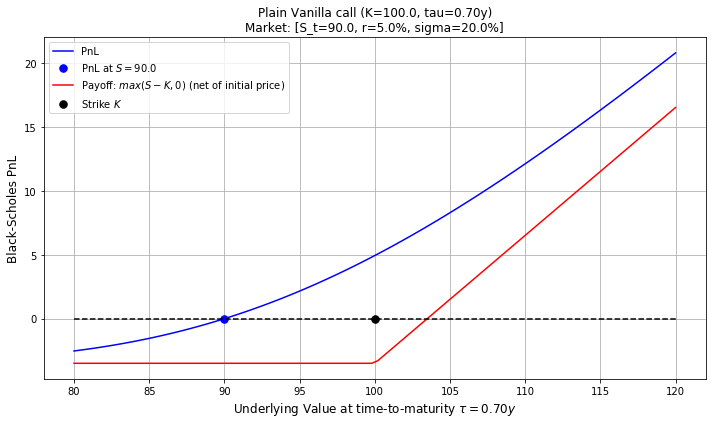

In [175]:
Vanilla_Call_plotter.plot(method_name='PnL')

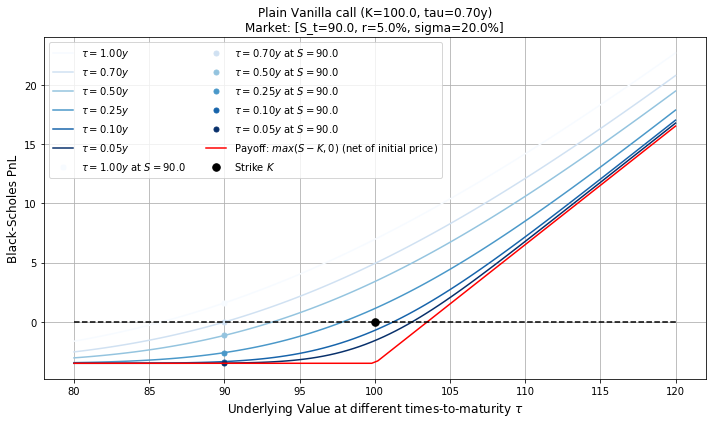

In [176]:
Vanilla_Call_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.7, 1.0], method_name='PnL')

In [177]:
class PortfolioPlotter(Plotter):
    """
    Plotter class for portfolio of options
    """
    
    def __init__(self, *args, **kwargs):
        # calling the Plotter constructor
        super(PortfolioPlotter, self).__init__(*args, **kwargs)
    
    def plot(self, *args, method_name='price', **kwargs):
        
        # parse optional parameters
        if len(args) > 0:
            self.set_x_axis(args[0])
        elif 'S' in kwargs:
            self.set_x_axis(kwargs['S'])
            
        if len(args) > 1:
            self.set_tau(args[1])
        elif 'tau' in kwargs:
            self.set_tau(kwargs['tau'])
            
        # get x-axis and, possibly, multi-tau
        x_axis = self.get_x_axis()
        tau = self.get_tau()
        
        if isinstance(tau, Iterable):
            self.__plot_multi_tau(x_axis, tau, method_name)
        else:
            plot_instrument_payoffs = args[2] if len(args) > 2 else kwargs['plot_instrument_payoffs'] if 'plot_instrument_payoffs' in kwargs else False
            self.__plot_single_tau(x_axis, tau, plot_instrument_payoffs, method_name)
            
    def __plot_multi_tau(self, S, multi_tau, method_name):
        """
        Plot Portfolio values against underlying value(s), possibly at multiple times-to-maturity.
        """
        
        plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(multi_tau))))

        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))

        # plot the price for different underlying values, one line for each different time to maturity tau
        for tau in multi_tau:
            ax.plot(S, getattr(self.fin_inst, method_name)(S, tau), '-', lw=1.5, label=r"$\tau={:.2f}y$".format(tau))

        # blue dot at original underlying level for reference, one dot for each different time to maturity tau
        for tau in multi_tau:
            S_t = self.fin_inst.get_S()
            ax.plot(S_t, getattr(self.fin_inst, method_name)(S_t, tau), '.', ms=10, 
                    label=r"$\tau={:.2f}y$ at $S={:.1f}$".format(tau, S_t))
            
        # plot the red payoff line for different underlying values
        if method_name == 'PnL':
            ax.plot(S, self.fin_inst.PnL(S, tau=0.0), 'r-',  lw=1.5, label=r"PnL at maturity")
        else:
            ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=r"Payoff at maturity")

        # plot a dot to highlight the strike position and a reference zero line
        strikes = self.fin_inst.get_K()
        ax.plot(strikes, np.zeros_like(strikes), 'k.', ms=15, label="Strikes $K$")
        ax.plot(S, np.zeros_like(S), 'k--', lw=1.5)
        
        # set axis labels 
        ax.set_xlabel(r"Underlying Value at different times-to-maturity $\tau$", fontsize=12)
        ax.set_ylabel('Black-Scholes {}'.format(method_name), fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=2)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()
    
    def __plot_single_tau(self, S, tau, plot_instrument_payoffs, method_name):
        """
        Plot Portfolio values against underlying value(s) at fixed time-to-maturity. Optionally, it plots component
        instruments payoffs.
        """
        
        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))
        
        # plot the price for different underlying values
        if tau > 0:
            ax.plot(S, getattr(self.fin_inst, method_name)(S, tau), 'b-', lw=1.5, 
                    label=method_name + r" at $\tau={:.2f}y$".format(tau))
        
        # blue dot at original underlying level for reference
        S_t = self.fin_inst.get_S()
        ax.plot(S_t, getattr(self.fin_inst, method_name)(S_t, tau), 'b.', ms=15, 
                label=method_name + r" at $S={:.1f}$".format(S_t))
        
        # plot the red payoff line for different underlying values
        if method_name == 'PnL':
            ax.plot(S, self.fin_inst.PnL(S, tau=0.0), 'r-',  lw=1.5, label=r"PnL at maturity")
        else:
            ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=r"Payoff at maturity")

        # optionally, plot the instruments payoffs
        if plot_instrument_payoffs:
            
            # set a color cycle according to the number of instruments in portfolio
            number_of_instruments = len(self.fin_inst.get_composition())
            plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.RdYlGn(np.linspace(0,1,number_of_instruments)))
            
            for inst in self.fin_inst.get_composition():
                position = inst["position"]

                if method_name == 'PnL':
                    ax.plot(S, position * inst["instrument"].PnL(S, tau=0.0), '--',  lw=1.5, 
                            label=inst["info"] + r" PnL at maturity")
                else:
                    ax.plot(S, position * inst["instrument"].payoff(S), '--',  lw=1.5, 
                            label=inst["info"] + r" payoff at maturity")
                
        # plot a dot to highlight the strike position and a reference zero line
        strikes = self.fin_inst.get_K()
        ax.plot(strikes, np.zeros_like(strikes), 'k.', ms=15, label="Strikes $K$")
        ax.plot(S, np.zeros_like(S), 'k--', lw=1.5)

        # set axis labels 
        ax.set_xlabel(r"Underlying Value", fontsize=12) 
        ax.set_ylabel('Black-Scholes {}'.format(method_name), fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=1)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()

    # method to plot portfolio at a given date
    def plot_t(self, valuation_date, method_name='price', plot_single_instruments=True):
        """
        Plot Portfolio values against underlying value(s) in a given valuation date. Optionally, it plots component
        instruments positions.
        """
                    
        # get x-axis
        S = self.get_x_axis()
     
        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))
        
        # plot the price for different underlying values
        ax.plot(S, getattr(self.fin_inst, method_name)(S, t=valuation_date), 'b-', lw=1.5, 
                label=method_name + r" at t={}".format(valuation_date))
        
        # blue dot at original underlying level for reference
        S_t = self.fin_inst.get_S()
        ax.plot(S_t, getattr(self.fin_inst, method_name)(S_t, t=valuation_date), 'b.', ms=15, 
                label=method_name + r" at $S={:.1f}$".format(S_t))
        
        # optionally, plot the instruments positions at valuation_date
        if plot_single_instruments:
            
            # set a color cycle according to the number of instruments in portfolio
            number_of_instruments = len(self.fin_inst.get_composition())
            plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.RdYlGn(np.linspace(0,1,number_of_instruments)))
            
            for inst in self.fin_inst.get_composition():
                position = inst["position"]

                if method_name == 'PnL':
                    ax.plot(S, position * inst["instrument"].PnL(S, t=valuation_date), '--',  lw=1.5, 
                            label=inst["info"] + r" PnL at t={}".format(valuation_date))
                else:
                    ax.plot(S, position * inst["instrument"].price(S, t=valuation_date), '--',  lw=1.5, 
                            label=inst["info"] + r" price at t={}".format(valuation_date))
                
        # plot a dot to highlight the strike position and a reference zero line
        strikes = self.fin_inst.get_K()
        ax.plot(strikes, np.zeros_like(strikes), 'k.', ms=15, label="Strikes $K$")
        ax.plot(S, np.zeros_like(S), 'k--', lw=1.5)

        # set axis labels 
        ax.set_xlabel(r"Underlying Value", fontsize=12) 
        ax.set_ylabel('Black-Scholes {}'.format(method_name), fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=1)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()
        


we check the `PortfolioPlotter` in some specific situations

## A. Short positions on options

Let's start making a simple option strategy: a short Put position.

In [178]:
Vanilla_Put = PlainVanillaOption(market_env, option_type='put')
Vanilla_Put

Initializing the EuropeanOption!


PlainVanillaOption('put', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [179]:
short_put_ptf = Portfolio()
short_put_ptf.add_instrument(Vanilla_Put, -1)
short_put_ptf

Dummy Portfolio: 
Short 1 Plain Vanilla put (K=100.0, tau=0.70y)

In [180]:
ptf_plotter = PortfolioPlotter(short_put_ptf)

Calling the Plotter initializer!


Here is the value of the short position:

- the red line represents the payoff of the position: negative if the option is exercised at maturity, otherwise null;
- the blue line represents is the nominally negative value of the position. You can think of it as the amount of money needed to close the position when the residual time-to-maturity of the option is $\tau$, that is to buy (aka _going long_ ) another put with same strike and expiration date of the one we sold.

In our example we sold a put option of strike $K=\$100$ and time-to-maturity $\tau=0.7$ years (when the market value of the underlying was $S_t = \$90 $) and evaluate the position for different values of the underlying when the residual time-to-maturity of the option is $\tau=0.3$ years. 

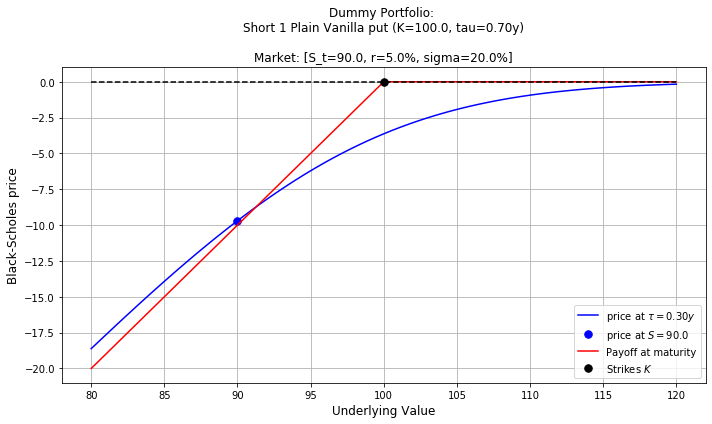

In [181]:
ptf_plotter.plot(tau=0.3)

As we see, the put gets exercised at maturity if $S_T < K$, and, at maturity, it generates a profit if the initial payment $p(S_t=\$90; \tau=0.7y)$ received when the put is sold is not offset by the payoff $K-S_T$ to be granted to owner of the option if he/she exercises the option at expiration $T$. 

Notice that comparing the payoff paid at maturity with the initial price of the option, as we are doing, intentionally neglects the time value of money.

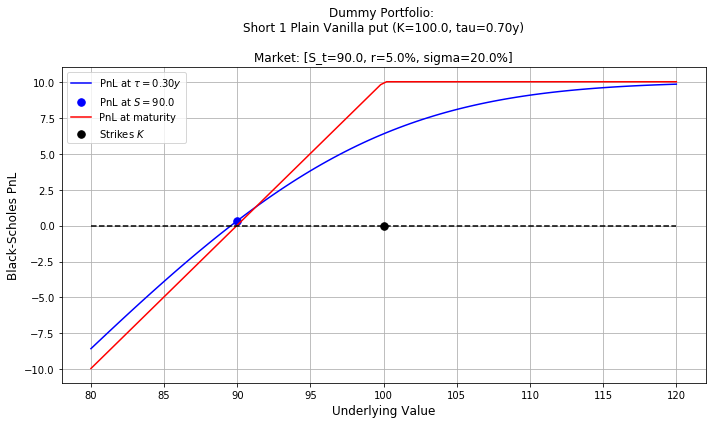

In [182]:
ptf_plotter.plot(method_name='PnL', tau=0.3)

Notice a detail: given an initial price $p(S=\$90; \tau=0.7y)$ of

In [183]:
Vanilla_Put.price()

10.041330587465126

and a current price at same underlying value $p(S=\$90; \tau=0.3y)$ of 

In [184]:
Vanilla_Put.price(tau=0.3) # it uses .get_S() == $90

9.696591386961757

Due to the elapsed time (as time pass, options tend to get cheaper), the value of the put at $S_t=\$90$ decreased from $p(S=\$90; \tau=0.7y) \approx \$10.04 $ to $p(S=\$90; \tau=0.3y) \approx \$9.70$. That is - all else being equal (in particular $S=\$90$) - if we were to close our position (i.e. buy another option of same strike and maturity date) when $\tau=0.3$, we would have to pay less money $p(S=\$90; \tau=0.3y)$ than those we have received $p(S=\$90; \tau=0.7y)$ when we sold it. This slight decrease makes the 

$$
P\&L(S=\$90; \tau=0.3y) = p(S=\$90; \tau=0.3y) - p(S=\$90; \tau=0.7y) > 0
$$

slightly positive. 

In [185]:
short_put_ptf.PnL(tau=0.3)

0.34473920050336915

In [186]:
Vanilla_Put.price() - Vanilla_Put.price(tau=0.3)

0.34473920050336915

## B. spreads e straddles (same $\tau$ strategy)

### Bull spread

In [187]:
K_long = 80
K_short = 110

In [188]:
Vanilla_Call_long = PlainVanillaOption(market_env, K=K_long)
Vanilla_Call_long

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=80.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [189]:
Vanilla_Call_short = PlainVanillaOption(market_env, K=K_short)
Vanilla_Call_short

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=110.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [190]:
bull_spread_ptf = Portfolio(name="Bull Spread Strategy")
bull_spread_ptf.add_instrument(Vanilla_Call_long, 1)
bull_spread_ptf.add_instrument(Vanilla_Call_short, -1)
bull_spread_ptf

Bull Spread Strategy Portfolio: 
Long 1 Plain Vanilla call (K=80.0, tau=0.70y)
Short 1 Plain Vanilla call (K=110.0, tau=0.70y)

In [191]:
bull_spread_ptf_plotter = PortfolioPlotter(bull_spread_ptf)

Calling the Plotter initializer!


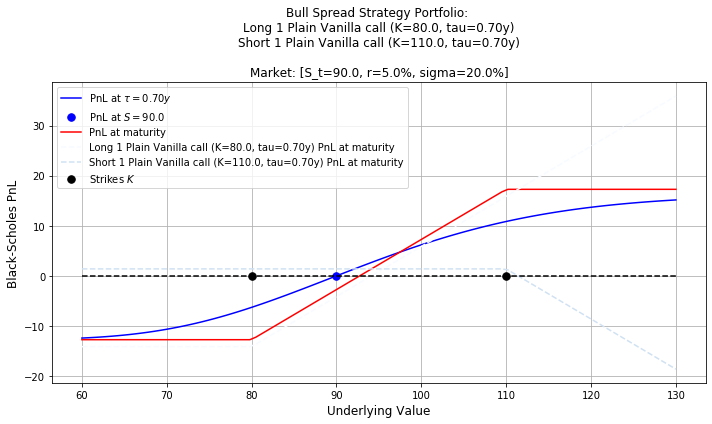

In [192]:
bull_spread_ptf_plotter.plot(method_name="PnL", plot_instrument_payoffs=True)

### Straddle

In [193]:
Vanilla_Call = PlainVanillaOption(market_env)
Vanilla_Call

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [194]:
Vanilla_Put = PlainVanillaOption(market_env, option_type='put')
Vanilla_Put

Initializing the EuropeanOption!


PlainVanillaOption('put', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [195]:
straddle_ptf = Portfolio(name="Straddle Strategy")
straddle_ptf.add_instrument(Vanilla_Call, 1)
straddle_ptf.add_instrument(Vanilla_Put, 1)
straddle_ptf

Straddle Strategy Portfolio: 
Long 1 Plain Vanilla call (K=100.0, tau=0.70y)
Long 1 Plain Vanilla put (K=100.0, tau=0.70y)

In [196]:
straddle_ptf_plotter = PortfolioPlotter(straddle_ptf)

Calling the Plotter initializer!


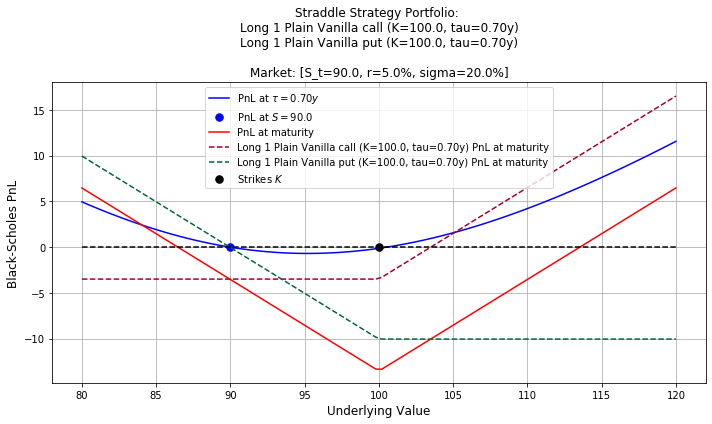

In [197]:
straddle_ptf_plotter.plot(method_name="PnL", plot_instrument_payoffs=True)

## C. calendar spreads (multi $\tau$ strategy)

In [198]:
market_env.get_t()

datetime.datetime(2020, 4, 19, 0, 0)

In [199]:
T_short_term = "31-05-2020"
T_long_term = "30-08-2020"

In [200]:
Vanilla_Call_short_term = PlainVanillaOption(market_env, T=T_short_term, K = market_env.get_S()-10)
Vanilla_Call_short_term

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=80.0, t=19-04-2020, T=31-05-2020, tau=0.12y, r=5.0%, sigma=20.0%)

In [201]:
Vanilla_Call_long_term = PlainVanillaOption(market_env, T=T_long_term, K = market_env.get_S()-10)
Vanilla_Call_long_term

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=80.0, t=19-04-2020, T=30-08-2020, tau=0.36y, r=5.0%, sigma=20.0%)

In [202]:
calendar_spread_ptf = Portfolio(name="Calendar Spread Strategy")
calendar_spread_ptf.add_instrument(Vanilla_Call_short_term, -1)
calendar_spread_ptf.add_instrument(Vanilla_Call_long_term, 1)
calendar_spread_ptf

Calendar Spread Strategy Portfolio: 
Short 1 Plain Vanilla call (K=80.0, tau=0.12y)
Long 1 Plain Vanilla call (K=80.0, tau=0.36y)

In [203]:
calendar_spread_ptf_plotter = PortfolioPlotter(calendar_spread_ptf)

Calling the Plotter initializer!


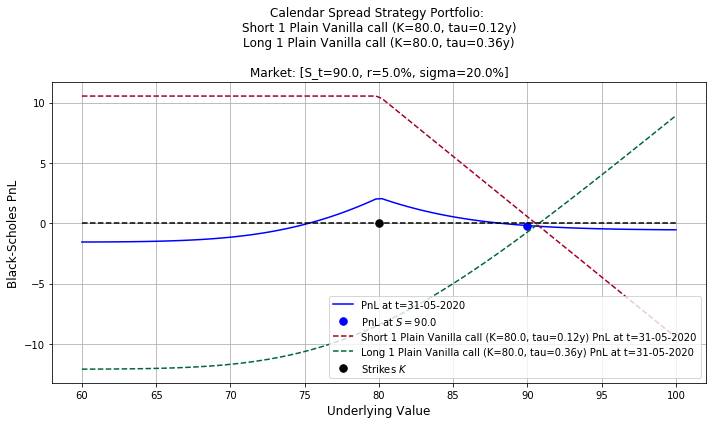

In [204]:
calendar_spread_ptf_plotter.plot_t(valuation_date=T_short_term, method_name="PnL", plot_single_instruments=True)